## COM5508 Supervised Word Embeddings "Chinese Cuisine Similarity"
- Cuisine similarity analysis
- Purpose of our machine learning:
  1. Predicting the dish type through ingredients 菜系
  2. Predicting the taste through ingredients 口味
  3. Predicting the popularity through ingredients 受欢迎程度
- The source of data: Meishijie_a traditional recipe website

### 1. Data Observation


In [3]:
# import pandas
import os
import pandas as pd
import csv
import json

In [245]:
### contacting raw data files
Folder_Path = r'/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/recipe'
SaveFile_Name = r'recipe_all.csv'              #合并后要保存的文件名

#修改当前工作目录
os.chdir(Folder_Path)
#将该文件夹下的所有文件名存入一个列表
file_list = os.listdir()
print(file_list)
box_header=['name','gy','people','taste','cooking_time','type','popular','ingredient']
with open(SaveFile_Name,'a',newline='',encoding='utf-8') as csvfile:
    writer=csv.writer(csvfile)
    if type(box_header) == list:
        writer.writerow(box_header)
    else:
        writer.writerow([box_header])
#循环遍历列表中各个CSV文件名，并追加到合并后的文件
for i in range(0,len(file_list)):
    df = pd.read_csv( Folder_Path + '/'+ file_list[i], encoding='utf_8' )
    df.to_csv(SaveFile_Name,encoding="utf_8",index=False, header=False, mode='a+')

['recipe.csv', 'recipe_2.csv']


In [3]:
df = pd.read_csv('/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/recipe/recipe_all.csv')
df

,name,gy,people,taste,cooking_time,type,popular,ingredient
0,['剁椒茉莉花炒鸡肉'],['炒'],['2人份'],['咸鲜味'],['<10分钟'],['云贵菜'],['25 评论 4194 人气'],"['主料', '', '剁椒茉莉花', '', '莲藕', '', '', '胡萝卜', '..."
1,['宽汤羊肉揪面片'],['煮'],['4人份'],['茄汁味'],['<60分钟'],['云贵菜'],['32 评论 6207 人气'],"['主料', '', '饺子粉', '', '', '羊肉', '', '', '土豆', ..."
2,['红三剁'],['炒'],['2人份'],['茄汁味'],['<10分钟'],['云贵菜'],['28 评论 5214 人气'],"['主料', '', '瘦肉', '', '', '西红柿', '', '', '青椒', ..."
3,['火腿清汤鸡'],['炖'],['4人份'],['咸鲜味'],['<60分钟'],['云贵菜'],['0 评论 2625 人气'],"['主料', '', '鸡腿', '', '', '火腿', '', '', '鸡枞菌', ..."
4,['云南香辣凉拌卷粉'],['拌'],['2人份'],['香辣味'],['<5分钟'],['云贵菜'],['18 评论 7287 人气'],"['主料', '', '肠粉皮', '', '鸡枞油', '大葱', '酱油', '醋', ..."
5,['浇汁汆斑鱼'],['汆'],['2人份'],['咸鲜味'],['<60分钟'],['云贵菜'],['11 评论 13886 人气'],"['主料', '', '乌鳢', '', '花生油', '食盐', '醋', '姜', '蒜..."
6,['酸汤金菇肥牛'],['煮'],['2人份'],['酸辣味'],['<15分钟'],['云贵菜'],['154 评论 33835 人气'],"['主料', '', '金针菇', '', '', '肥牛', '', '红尖椒', '尖椒..."
7,['洋芋饭'],['焖'],['3人份'],['咸鲜味'],['<30分钟'],['云贵菜'],['51 评论 23636 人气'],"['主料', '', '大米', '', '', '土豆', '', '食盐', '植物油']"
8,['香芋汽锅乌鸡'],['蒸'],['2人份'],['咸鲜味'],[],['云贵菜'],['2 评论 6466 人气'],"['主料', '', '乌骨鸡', '', '虫草花', '芋头', '食盐', '葱', ..."
9,['酸菜版老奶洋芋'],['炒'],['2人份'],['香辣味'],['<15分钟'],['云贵菜'],['10 评论 14824 人气'],"['主料', '', '土豆', '', '', '酸菜', '', '胡萝卜', '食盐'..."


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 8 columns):
name            14299 non-null object
gy              14299 non-null object
people          14299 non-null object
taste           14299 non-null object
cooking_time    14299 non-null object
type            14299 non-null object
popular         14299 non-null object
ingredient      14299 non-null object
dtypes: object(8)
memory usage: 893.8+ KB


In [9]:
tastelist = df['taste'].tolist()
tastelist = list(set(tastelist))
len(tastelist)

34

### 2. Data Preprocessing & Cleaning
- preprocessing null value and duplicates
- splitting popularity
- integrients preprocessing

In [6]:
# drop all the non-text parts
for column in df.columns.tolist():
    df[column] = df[column].str.replace('[^\w\s]',"")
#df

In [7]:
for column in df.columns.tolist():
    df[column] = df[column].apply(lambda s: None if s is '' else s)
#df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 8 columns):
name            14297 non-null object
gy              14297 non-null object
people          4409 non-null object
taste           14297 non-null object
cooking_time    4453 non-null object
type            14299 non-null object
popular         14299 non-null object
ingredient      9577 non-null object
dtypes: object(8)
memory usage: 893.8+ KB


In [9]:
# drop the null-ingredient lines
df_2 = df.dropna(subset=['ingredient'])
df_2

,name,gy,people,taste,cooking_time,type,popular,ingredient
0,剁椒茉莉花炒鸡肉,炒,2人份,咸鲜味,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...
1,宽汤羊肉揪面片,煮,4人份,茄汁味,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...
2,红三剁,炒,2人份,茄汁味,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末
3,火腿清汤鸡,炖,4人份,咸鲜味,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...
4,云南香辣凉拌卷粉,拌,2人份,香辣味,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱
5,浇汁汆斑鱼,汆,2人份,咸鲜味,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱
6,酸汤金菇肥牛,煮,2人份,酸辣味,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤
7,洋芋饭,焖,3人份,咸鲜味,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油
8,香芋汽锅乌鸡,蒸,2人份,咸鲜味,None,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒
9,酸菜版老奶洋芋,炒,2人份,香辣味,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...


In [10]:
# fill the null cooking time
df_2['cooking_time'] = df_2['cooking_time'].fillna(method = 'ffill')
df_2

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,gy,people,taste,cooking_time,type,popular,ingredient
0,剁椒茉莉花炒鸡肉,炒,2人份,咸鲜味,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...
1,宽汤羊肉揪面片,煮,4人份,茄汁味,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...
2,红三剁,炒,2人份,茄汁味,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末
3,火腿清汤鸡,炖,4人份,咸鲜味,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...
4,云南香辣凉拌卷粉,拌,2人份,香辣味,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱
5,浇汁汆斑鱼,汆,2人份,咸鲜味,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱
6,酸汤金菇肥牛,煮,2人份,酸辣味,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤
7,洋芋饭,焖,3人份,咸鲜味,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油
8,香芋汽锅乌鸡,蒸,2人份,咸鲜味,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒
9,酸菜版老奶洋芋,炒,2人份,香辣味,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...


In [11]:
df_2['comment'] = None
df_2['popularity'] = None
df_2['seperated_ingredients'] = None
df_2

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients
0,剁椒茉莉花炒鸡肉,炒,2人份,咸鲜味,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...,None,None,None
1,宽汤羊肉揪面片,煮,4人份,茄汁味,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...,None,None,None
2,红三剁,炒,2人份,茄汁味,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末,None,None,None
3,火腿清汤鸡,炖,4人份,咸鲜味,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...,None,None,None
4,云南香辣凉拌卷粉,拌,2人份,香辣味,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱,None,None,None
5,浇汁汆斑鱼,汆,2人份,咸鲜味,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱,None,None,None
6,酸汤金菇肥牛,煮,2人份,酸辣味,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤,None,None,None
7,洋芋饭,焖,3人份,咸鲜味,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油,None,None,None
8,香芋汽锅乌鸡,蒸,2人份,咸鲜味,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒,None,None,None
9,酸菜版老奶洋芋,炒,2人份,香辣味,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...,None,None,None


In [12]:
# spliting the popularity 
for i in range(0,14299):
    try:
        item = df_2.popular[i]
        items = item.split()
        df_2['comment'][i] = items[0]
        df_2['popularity'][i] = items[2] 
    except Exception:
        pass
print("over")

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


over


In [14]:
df_2[df_2['comment'].str.contains('北京')==True]
df_2=df_2.drop(index=13143)

In [15]:
df_2['comment'].apply(lambda x: int(x))
df_2['popularity'].apply(lambda x: int(x))

0         4194
1         6207
2         5214
3         2625
4         7287
5        13886
6        33835
7        23636
8         6466
9        14824
10       22376
11       14927
12       25607
13       15634
14       19309
15       29300
16        6682
17       22465
18       13585
19        9410
20       19903
21       15719
22        9962
23       10930
24       10559
25       20188
26        3087
27        8870
28        6985
29       18907
         ...  
14256     7422
14257      988
14258     1114
14259      857
14260    10407
14261     5751
14263     2615
14264      827
14265     1476
14268      997
14269      603
14271     1384
14272     7851
14273     7026
14274     3785
14275      965
14276     2242
14277     1884
14278     7422
14279     5205
14281     8775
14282     2510
14285    11818
14287     5448
14289     2452
14293    12958
14294     1040
14295    41312
14297    13467
14298     8117
Name: popularity, Length: 9576, dtype: int64

In [279]:
df_2['seperated_ingredients'] = df_2['ingredient'].apply(lambda x: ",".join(x for x in x.split() if x != "主料"))

In [55]:
#for i in df_2['seperated_ingredients']:
#    item = i.split(',')
df_2['ingredients'] = df_2['seperated_ingredients'].apply(lambda x: x.split(','))

In [18]:
tastelist = df_2['taste'].tolist()
tastelist = list(set(tastelist))
print(tastelist)

['酸甜味', '糖醋味', '蒜香味', '香辣味', '姜汁味', '酸辣味', '其它口味', '芥末味', '苦香味', '椒麻味', '鱼香味', '甜味', '酸味', '酱香味', '葱香味', '怪味', '其他口味', '孜然味', '辣味', '豆瓣味', '香草味', '奶香味', '茄汁味', '家常味', '糊辣味', '咖喱味', '果味', '红油味', '麻辣味', '黑椒味', '咸鲜味', '五香味', '麻酱味']


In [19]:
replace_dic = {'家常味':'咸&鲜','红油味':'麻&辣','糖醋味':'甜&酸','蒜香味':'咸&香','咖喱味':'咸&香&辣',
                '麻辣味':'麻&辣','鱼香味':'咸&鲜','茄汁味':'咸&鲜','黑椒味':'咸&香&辣','香辣味':'香&辣',
                '酸甜味':'甜&酸','孜然味':'香&辣&咸','苦香味':'苦&香','五香味':'香','糊辣味':'辣','辣味':'辣',
                '葱香味':'咸&香','芥末味':'辣','酸味':'酸','甜味':'甜','姜汁味':'辣&咸&香','咸鲜味':'咸&鲜',
                '怪味':'咸&辣','酸辣味':'酸&辣','椒麻味':'麻&辣','酱香味':'咸&香','麻酱味':'咸&麻',
                '豆瓣味':'咸&辣','果味':'甜','香草味':'甜&香','奶香味':'甜&香','其他口味':'咸&香','其它口味':'咸&香'}

In [20]:
df_2['taste'] = df_2['taste'].apply(lambda x: replace_dic[x])

In [505]:
#df_2['taste'] = df_2['taste'].apply(lambda x: x.split('&'))
#df_2['taste'] = df_2['taste'].str.replace('[^\w\s]',"")

In [284]:
df_2

,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients
0,剁椒茉莉花炒鸡肉,炒,2人份,咸&鲜,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...,25,4194,"剁椒茉莉花,莲藕,胡萝卜,芹菜,黄瓜,鸡胸肉,小葱,蒜,姜,盐,酱油,蚝油,花椒油,鸡粉,白胡椒粉","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[剁椒茉莉花, 莲藕, 胡萝卜, 芹菜, 黄瓜, 鸡胸肉, 小葱, 蒜, 姜, 盐, 酱油,..."
1,宽汤羊肉揪面片,煮,4人份,咸&鲜,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...,32,6207,"饺子粉,羊肉,土豆,西红柿,胡萝卜,菠菜,干红辣椒,花椒,胡椒粉,大蒜,葱,香菜,香醋","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[饺子粉, 羊肉, 土豆, 西红柿, 胡萝卜, 菠菜, 干红辣椒, 花椒, 胡椒粉, 大蒜,..."
2,红三剁,炒,2人份,咸&鲜,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末,28,5214,"瘦肉,西红柿,青椒,酱油,料酒,淀粉,盐,姜末","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[瘦肉, 西红柿, 青椒, 酱油, 料酒, 淀粉, 盐, 姜末]"
3,火腿清汤鸡,炖,4人份,咸&鲜,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...,0,2625,"鸡腿,火腿,鸡枞菌,生姜,食盐,胡椒粉,八角,花椒,桂皮,香叶,干姜,陈皮,当归,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[鸡腿, 火腿, 鸡枞菌, 生姜, 食盐, 胡椒粉, 八角, 花椒, 桂皮, 香叶, 干姜,..."
4,云南香辣凉拌卷粉,拌,2人份,香&辣,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱,18,7287,"肠粉皮,鸡枞油,大葱,酱油,醋,食盐,味精,五香粉,白芝麻,植物油,白糖,番茄酱","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[肠粉皮, 鸡枞油, 大葱, 酱油, 醋, 食盐, 味精, 五香粉, 白芝麻, 植物油, 白..."
5,浇汁汆斑鱼,汆,2人份,咸&鲜,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱,11,13886,"乌鳢,花生油,食盐,醋,姜,蒜,花椒,小米椒,蒸鱼豉油,胡椒,小葱","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[乌鳢, 花生油, 食盐, 醋, 姜, 蒜, 花椒, 小米椒, 蒸鱼豉油, 胡椒, 小葱]"
6,酸汤金菇肥牛,煮,2人份,酸&辣,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤,154,33835,"金针菇,肥牛,红尖椒,尖椒,食盐,鸡精,姜,蒜,植物油,水,红酸汤","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[金针菇, 肥牛, 红尖椒, 尖椒, 食盐, 鸡精, 姜, 蒜, 植物油, 水, 红酸汤]"
7,洋芋饭,焖,3人份,咸&鲜,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油,51,23636,"大米,土豆,食盐,植物油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[大米, 土豆, 食盐, 植物油]"
8,香芋汽锅乌鸡,蒸,2人份,咸&鲜,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒,2,6466,"乌骨鸡,虫草花,芋头,食盐,葱,姜,黄酒","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[乌骨鸡, 虫草花, 芋头, 食盐, 葱, 姜, 黄酒]"
9,酸菜版老奶洋芋,炒,2人份,香&辣,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...,10,14824,"土豆,酸菜,胡萝卜,食盐,酱油,姜,蒜,八角,小米椒,料酒,小葱,花椒粉,孜然,五香粉,植物...","[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[土豆, 酸菜, 胡萝卜, 食盐, 酱油, 姜, 蒜, 八角, 小米椒, 料酒, 小葱, 花..."


In [282]:
type(df_2.seperated_ingredients[0])

str

In [431]:
df_2.to_csv('cleaning_recipe_2.csv',encoding='utf_8') 

In [4]:
df_2 = pd.read_csv('cleaning_recipe.csv')
df_2

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients
0,0,剁椒茉莉花炒鸡肉,炒,2人份,咸&鲜,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...,25,4194,"剁椒茉莉花,莲藕,胡萝卜,芹菜,黄瓜,鸡胸肉,小葱,蒜,姜,盐,酱油,蚝油,花椒油,鸡粉,白胡椒粉","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['剁椒茉莉花', '莲藕', '胡萝卜', '芹菜', '黄瓜', '鸡胸肉', '小葱'..."
1,1,宽汤羊肉揪面片,煮,4人份,咸&鲜,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...,32,6207,"饺子粉,羊肉,土豆,西红柿,胡萝卜,菠菜,干红辣椒,花椒,胡椒粉,大蒜,葱,香菜,香醋","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['饺子粉', '羊肉', '土豆', '西红柿', '胡萝卜', '菠菜', '干红辣椒'..."
2,2,红三剁,炒,2人份,咸&鲜,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末,28,5214,"瘦肉,西红柿,青椒,酱油,料酒,淀粉,盐,姜末","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","['瘦肉', '西红柿', '青椒', '酱油', '料酒', '淀粉', '盐', '姜末']"
3,3,火腿清汤鸡,炖,4人份,咸&鲜,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...,0,2625,"鸡腿,火腿,鸡枞菌,生姜,食盐,胡椒粉,八角,花椒,桂皮,香叶,干姜,陈皮,当归,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['鸡腿', '火腿', '鸡枞菌', '生姜', '食盐', '胡椒粉', '八角', '..."
4,4,云南香辣凉拌卷粉,拌,2人份,香&辣,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱,18,7287,"肠粉皮,鸡枞油,大葱,酱油,醋,食盐,味精,五香粉,白芝麻,植物油,白糖,番茄酱","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","['肠粉皮', '鸡枞油', '大葱', '酱油', '醋', '食盐', '味精', '五..."
5,5,浇汁汆斑鱼,汆,2人份,咸&鲜,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱,11,13886,"乌鳢,花生油,食盐,醋,姜,蒜,花椒,小米椒,蒸鱼豉油,胡椒,小葱","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","['乌鳢', '花生油', '食盐', '醋', '姜', '蒜', '花椒', '小米椒'..."
6,6,酸汤金菇肥牛,煮,2人份,酸&辣,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤,154,33835,"金针菇,肥牛,红尖椒,尖椒,食盐,鸡精,姜,蒜,植物油,水,红酸汤","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","['金针菇', '肥牛', '红尖椒', '尖椒', '食盐', '鸡精', '姜', '蒜..."
7,7,洋芋饭,焖,3人份,咸&鲜,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油,51,23636,"大米,土豆,食盐,植物油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","['大米', '土豆', '食盐', '植物油']"
8,8,香芋汽锅乌鸡,蒸,2人份,咸&鲜,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒,2,6466,"乌骨鸡,虫草花,芋头,食盐,葱,姜,黄酒","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","['乌骨鸡', '虫草花', '芋头', '食盐', '葱', '姜', '黄酒']"
9,9,酸菜版老奶洋芋,炒,2人份,香&辣,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...,10,14824,"土豆,酸菜,胡萝卜,食盐,酱油,姜,蒜,八角,小米椒,料酒,小葱,花椒粉,孜然,五香粉,植物...","[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","['土豆', '酸菜', '胡萝卜', '食盐', '酱油', '姜', '蒜', '八角'..."


#### - Remove outliers

In [5]:
df_2['ingredients'] = df_2['seperated_ingredients'].apply(lambda x: x.split(','))

In [6]:
# Remove outliers
df_2['num_ingredients'] = df_2['ingredients'].apply(len)
df_2 = df_2[df_2['num_ingredients'] > 1]

In [9]:
#df_2

#### - Remove other recipes

In [7]:
df_2 = df_2[df_2['type'] != '其它菜']

In [8]:
dangao=df_2[df_2['name'].str.contains('蛋糕')].index.tolist()
for i in dangao:
    df_2=df_2.drop(index=i)

In [9]:
qf = df_2[df_2['name'].str.contains('戚风')].index.tolist()
for i in qf:
    df_2=df_2.drop(index=i)

In [10]:
ms = df_2[df_2['name'].str.contains('慕司')].index.tolist()
for i in ms:
    df_2=df_2.drop(index=i)

In [11]:
df_2[df_2['type']== '闽菜']
#8291

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients
5661,8619,客家烫蛋皮,煮,4人份,咸&香,30分钟,闽菜,27 评论 4586 人气,主料 木薯粉 鸡蛋 淀粉 水 盐 油 葱花儿 姜,27,4586,"木薯粉,鸡蛋,淀粉,水,盐,油,葱花儿,姜","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[木薯粉, 鸡蛋, 淀粉, 水, 盐, 油, 葱花儿, 姜]",8
5662,8620,客家酿豆腐,烧,2人份,咸&鲜,15分钟,闽菜,27 评论 4964 人气,主料 豆腐 猪肉 香葱 食盐 蚝油 酱油 白糖,27,4964,"豆腐,猪肉,香葱,食盐,蚝油,酱油,白糖","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[豆腐, 猪肉, 香葱, 食盐, 蚝油, 酱油, 白糖]",7
5663,8621,泉州醋肉,炸,未知,甜&酸,30分钟,闽菜,144 评论 20553 人气,主料 猪里脊肉 地瓜粉 白砂糖 盐 酱油 老陈醋 五香粉,144,20553,"猪里脊肉,地瓜粉,白砂糖,盐,酱油,老陈醋,五香粉","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[猪里脊肉, 地瓜粉, 白砂糖, 盐, 酱油, 老陈醋, 五香粉]",7
5664,8622,八宝芋泥,蒸,3人份,甜,30分钟,闽菜,26 评论 11853 人气,主料 槟榔芋 花生 芝麻 红枣 猪油炼 白砂糖 开水,26,11853,"槟榔芋,花生,芝麻,红枣,猪油炼,白砂糖,开水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[槟榔芋, 花生, 芝麻, 红枣, 猪油炼, 白砂糖, 开水]",7
5665,8623,炒薯粿,炒,2人份,咸&鲜,15分钟,闽菜,9 评论 7521 人气,主料 白薯 木薯粉 五花肉 蒜苗 酱油 味精 辣椒 蒜头 干辣椒,9,7521,"白薯,木薯粉,五花肉,蒜苗,酱油,味精,辣椒,蒜头,干辣椒","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[白薯, 木薯粉, 五花肉, 蒜苗, 酱油, 味精, 辣椒, 蒜头, 干辣椒]",9
5666,8624,花生仁汤,煮,3人份,咸&鲜,15分钟,闽菜,27 评论 8085 人气,主料 花生 大米粉 白糖,27,8085,"花生,大米粉,白糖","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[花生, 大米粉, 白糖]",3
5667,8625,太极芋泥,蒸,3人份,甜,15分钟,闽菜,3 评论 7515 人气,主料 芋头 猪油 红豆沙 樱桃 白糖 水,3,7515,"芋头,猪油,红豆沙,樱桃,白糖,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[芋头, 猪油, 红豆沙, 樱桃, 白糖, 水]",6
5668,8626,客家支竹焖牛腩,焖,3人份,咸&鲜,30分钟,闽菜,5 评论 6585 人气,主料 牛腩 腐竹 花生油 食盐 姜 蒜 大葱 陈皮 生抽 老抽 白糖 客家米酒 八角...,5,6585,"牛腩,腐竹,花生油,食盐,姜,蒜,大葱,陈皮,生抽,老抽,白糖,客家米酒,八角,高汤,水,料酒","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[牛腩, 腐竹, 花生油, 食盐, 姜, 蒜, 大葱, 陈皮, 生抽, 老抽, 白糖, 客家...",16
5669,8627,闽南芋头饭,煮,2人份,咸&鲜,60分钟,闽菜,23 评论 25227 人气,主料 大米 芋头 培根 红葱头 食盐 五香粉 水,23,25227,"大米,芋头,培根,红葱头,食盐,五香粉,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[大米, 芋头, 培根, 红葱头, 食盐, 五香粉, 水]",7
5670,8628,传统糟香烤鸭腿,烤,2人份,咸&鲜,30分钟,闽菜,5 评论 4121 人气,主料 鸭腿 红糟 白酒 盐 鸡精,5,4121,"鸭腿,红糟,白酒,盐,鸡精","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[鸭腿, 红糟, 白酒, 盐, 鸡精]",5


#### - Standardize the ingredients expression

In [12]:
ingre_count = pd.read_csv("ingredient_count.csv")
ingre_count.head()

,Unnamed: 0,ingredients,Count
0,0,a组料酒,1
1,1,a组淀粉,1
2,2,a组盐,1
3,3,b组料酒,1
4,4,b组水淀粉,1


In [26]:
ingre_count.

RangeIndex(start=0, stop=2280, step=1)

In [18]:
with open("entity2alias.json","r") as fp:
    entity2alias = json.load(fp)
with open("entity2type.json","r") as fp:
    entity2type = json.load(fp)

In [152]:
#print(entity2type['艾蒿'])

In [151]:
#print(entity2alias['白鱼'])

In [231]:
entity2alias

{'猪肉': ['猪肉'],
 '排骨': ['排骨', '肋排', '子排', '骨头'],
 '猪蹄': ['猪蹄', '猪脚', '猪手', '猪蹄爪'],
 '猪肚': ['猪肚', '猪胃', '猪堵'],
 '五花肉': ['五花肉', '方肉', '五花三层', '肋条肉', '三层肉'],
 '猪肝': ['猪肝'],
 '猪血': ['猪血', '液体肉', '血豆腐', '血花'],
 '猪腰': ['猪腰', '猪肾', '猪腰子'],
 '猪皮': ['猪皮', '肉皮'],
 '猪肘': ['猪肘', '蹄膀'],
 '猪耳朵': ['猪耳朵', '猪耳'],
 '猪心': ['猪心'],
 '猪肺': ['猪肺'],
 '猪大肠': ['猪大肠', '肥肠'],
 '猪大骨头': ['猪大骨头', '猪骨'],
 '猪小排': ['猪小排', '猪肋排'],
 '猪里脊肉': ['猪里脊肉', '里脊', '梅肉'],
 '猪脑': ['猪脑', '猪脑髓'],
 '猪排': ['猪排'],
 '猪舌头': ['猪舌头', '口条'],
 '猪脑袋': ['猪脑袋'],
 '牛肉': ['牛肉'],
 '牛腩': ['牛腩', '牛肉'],
 '牛排': ['牛排'],
 '肥牛': ['肥牛'],
 '牛肚': ['牛肚', '百叶', '肚尖', '牛胃', '牛百叶', '牛膍'],
 '牛蹄筋': ['牛蹄筋'],
 '牛尾': ['牛尾'],
 '牛肺': ['牛肺'],
 '牛肾': ['牛肾', '牛腰', '牛腰子'],
 '牛鞭': ['牛鞭', '牛冲'],
 '羊肉': ['羊肉'],
 '羊排': ['羊排', '羊肋'],
 '羊肝': ['羊肝'],
 '羊肚': ['羊肚', '羊胃', '羊膍胵', '羊膍眰'],
 '羊蝎子': ['羊蝎子'],
 '羊肾': ['羊肾', '羊腰', '羊肾子', '羊腰子'],
 '羊血': ['羊血'],
 '羊骨': ['羊骨', '羊脊骨', '羊骨头', '羊胫骨'],
 '鸡肉': ['鸡肉'],
 '鸡翅': ['鸡翅', '鸡翼', '大转弯'],
 '鸡腿': ['鸡腿'],
 '鸡爪': ['鸡爪', '鸡掌', '凤爪', '凤足'],
 '鸡肝'

In [74]:
print("原始共有%d种食材" % len(ingre_count))

原始共有2280种食材


In [22]:
from harvesttext import HarvestText
from collections import defaultdict

In [39]:
ht = HarvestText()
ht.add_entities(entity2alias, entity2type) # 将标准名和别名提供给harvesttext，后续可以用于匹配

ingre2entity = {}
entity2ingres = defaultdict(list)
for ingre in ingre_count.ingredients:
    entity_linked, type0 = ht.mention2entity(ingre)      # 使用harvesttext链接到实体，其利用先前提供的标准名和别名进行搜索
    if entity_linked is None:                            # 如果找不到对应实体，就让它单独成为实
        ingre2entity[ingre] = ingre
        entity2ingres[ingre].append(ingre)
    else:
        ingre2entity[ingre] = entity_linked
        entity2ingres[entity_linked].append(ingre)

In [40]:
print("链接后共有%d种食材" % len(entity2ingres))

链接后共有1340种食材


In [42]:
print(entity2ingres["小麦面粉"])

['a组淀粉', 'b组水淀粉', '中筋面粉', '低筋面粉', '低筋面粉油酥', '干淀粉', '普通面粉', '木薯淀粉', '水淀粉', '淀粉', '淀粉干', '淀粉水', '湿淀粉', '熟面粉', '生淀粉', '腌料淀粉', '面粉', '高筋面粉', '高筋面粉油酥']


In [43]:
ht.clear()      
ht.add_entities(entity2ingres)
ht.add_entities(entity2alias, entity2type)
ht.seg("牛腩 胡萝卜 辣豆瓣酱 料酒 八角 生姜片 香菜 洋葱 白糖",return_sent=True,standard_name=True)

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/harvesttext-0.5.4-py3.6.egg/harvesttext/harvesttext.py:126: UserWarning: You've added an entity twice with different types, the later type will be used.
  warnings.warn("You've added an entity twice with different types, the later type will be used.")


'牛腩   胡萝卜   辣 豆瓣酱   料酒   八角   姜   香菜   洋葱   白糖'

In [52]:
df_2['seg_ingres']=df_2.seperated_ingredients.apply(lambda x: ht.seg(x,return_sent=True,standard_name=True))

In [53]:
#df_2['seg_ingres'] = None
df_2

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients,seg_ingres
0,0,剁椒茉莉花炒鸡肉,炒,2人份,咸&鲜,10分钟,云贵菜,25 评论 4194 人气,主料 剁椒茉莉花 莲藕 胡萝卜 芹菜 黄瓜 鸡胸肉 小葱 蒜 ...,25,4194,"剁椒茉莉花,莲藕,胡萝卜,芹菜,黄瓜,鸡胸肉,小葱,蒜,姜,盐,酱油,蚝油,花椒油,鸡粉,白胡椒粉","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[剁椒茉莉花, 莲藕, 胡萝卜, 芹菜, 黄瓜, 鸡胸肉, 小葱, 蒜, 姜, 盐, 酱油,...",15,"剁椒茉莉花 , 藕 , 胡萝卜 , 水芹菜 , 黄瓜 , 鸡胸肉 , 小葱 , 蒜 , 姜 ..."
1,1,宽汤羊肉揪面片,煮,4人份,咸&鲜,60分钟,云贵菜,32 评论 6207 人气,主料 饺子粉 羊肉 土豆 西红柿 胡萝卜 菠菜 干红辣椒 花椒 胡椒粉 ...,32,6207,"饺子粉,羊肉,土豆,西红柿,胡萝卜,菠菜,干红辣椒,花椒,胡椒粉,大蒜,葱,香菜,香醋","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[饺子粉, 羊肉, 土豆, 西红柿, 胡萝卜, 菠菜, 干红辣椒, 花椒, 胡椒粉, 大蒜,...",13,"饺子粉 , 羊肉 , 土豆 , 西红柿 , 胡萝卜 , 菠菜 , 青椒 , 花椒 , 胡椒粉..."
2,2,红三剁,炒,2人份,咸&鲜,10分钟,云贵菜,28 评论 5214 人气,主料 瘦肉 西红柿 青椒 酱油 料酒 淀粉 盐 姜末,28,5214,"瘦肉,西红柿,青椒,酱油,料酒,淀粉,盐,姜末","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[瘦肉, 西红柿, 青椒, 酱油, 料酒, 淀粉, 盐, 姜末]",8,"瘦肉 , 西红柿 , 青椒 , 酱油 , 料酒 , 小麦面粉 , 盐 , 姜"
3,3,火腿清汤鸡,炖,4人份,咸&鲜,60分钟,云贵菜,0 评论 2625 人气,主料 鸡腿 火腿 鸡枞菌 生姜 食盐 胡椒粉 八角 花椒 桂皮 香叶 干姜 陈皮...,0,2625,"鸡腿,火腿,鸡枞菌,生姜,食盐,胡椒粉,八角,花椒,桂皮,香叶,干姜,陈皮,当归,水","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[鸡腿, 火腿, 鸡枞菌, 生姜, 食盐, 胡椒粉, 八角, 花椒, 桂皮, 香叶, 干姜,...",14,"鸡腿 , 火腿 , 鸡枞菌 , 姜 , 食盐 , 胡椒粉 , 八角 , 花椒 , 肉桂 , ..."
4,4,云南香辣凉拌卷粉,拌,2人份,香&辣,5分钟,云贵菜,18 评论 7287 人气,主料 肠粉皮 鸡枞油 大葱 酱油 醋 食盐 味精 五香粉 白芝麻 植物油 白糖 番茄酱,18,7287,"肠粉皮,鸡枞油,大葱,酱油,醋,食盐,味精,五香粉,白芝麻,植物油,白糖,番茄酱","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[肠粉皮, 鸡枞油, 大葱, 酱油, 醋, 食盐, 味精, 五香粉, 白芝麻, 植物油, 白...",12,"肠粉皮 , 鸡枞油 , 大葱 , 酱油 , 醋 , 食盐 , 味精 , 五香粉 , 芝麻 ,..."
5,5,浇汁汆斑鱼,汆,2人份,咸&鲜,60分钟,云贵菜,11 评论 13886 人气,主料 乌鳢 花生油 食盐 醋 姜 蒜 花椒 小米椒 蒸鱼豉油 胡椒 小葱,11,13886,"乌鳢,花生油,食盐,醋,姜,蒜,花椒,小米椒,蒸鱼豉油,胡椒,小葱","[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[乌鳢, 花生油, 食盐, 醋, 姜, 蒜, 花椒, 小米椒, 蒸鱼豉油, 胡椒, 小葱]",11,"乌鳢 , 花生油 , 食盐 , 醋 , 姜 , 蒜 , 花椒 , 小米 , 酱油 , 胡椒 ..."
6,6,酸汤金菇肥牛,煮,2人份,酸&辣,15分钟,云贵菜,154 评论 33835 人气,主料 金针菇 肥牛 红尖椒 尖椒 食盐 鸡精 姜 蒜 植物油 水 红酸汤,154,33835,"金针菇,肥牛,红尖椒,尖椒,食盐,鸡精,姜,蒜,植物油,水,红酸汤","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[金针菇, 肥牛, 红尖椒, 尖椒, 食盐, 鸡精, 姜, 蒜, 植物油, 水, 红酸汤]",11,"金针菇 , 肥牛 , 红尖椒 , 尖椒 , 食盐 , 鸡精 , 姜 , 蒜 , 植物油 , ..."
7,7,洋芋饭,焖,3人份,咸&鲜,30分钟,云贵菜,51 评论 23636 人气,主料 大米 土豆 食盐 植物油,51,23636,"大米,土豆,食盐,植物油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[大米, 土豆, 食盐, 植物油]",4,"大米 , 土豆 , 食盐 , 植物油"
8,8,香芋汽锅乌鸡,蒸,2人份,咸&鲜,30分钟,云贵菜,2 评论 6466 人气,主料 乌骨鸡 虫草花 芋头 食盐 葱 姜 黄酒,2,6466,"乌骨鸡,虫草花,芋头,食盐,葱,姜,黄酒","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[乌骨鸡, 虫草花, 芋头, 食盐, 葱, 姜, 黄酒]",7,"乌鸡 , 虫草花 , 芋头 , 食盐 , 大葱 , 姜 , 黄酒"
9,9,酸菜版老奶洋芋,炒,2人份,香&辣,15分钟,云贵菜,10 评论 14824 人气,主料 土豆 酸菜 胡萝卜 食盐 酱油 姜 蒜 八角 小米椒 料酒 小葱 花椒粉 孜然...,10,14824,"土豆,酸菜,胡萝卜,食盐,酱油,姜,蒜,八角,小米椒,料酒,小葱,花椒粉,孜然,五香粉,植物...","[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...","[土豆, 酸菜, 胡萝卜, 食盐, 酱油, 姜, 蒜, 八角, 小米椒, 料酒, 小葱, 花...",16,"土豆 , 酸菜 , 胡萝卜 , 食盐 , 酱油 , 姜 , 蒜 , 八角 , 小米 , 料酒..."


In [54]:
# a组，b组 remove
# chocolate,巧克力 -- 巧克力
# famer remove
# intense remove
# contain 香肠 -- 香肠
# paul全麦面包 -- 面包
# sinsin酸甜辣椒酱，contain甜辣酱--甜辣酱
# remove tortilla，chips
# 安佳黄油有盐 -- 黄油
# 茴香,茴香子,茴香籽,小茴香,香料八角 -- 八角
# contains 霸王花--霸王花干
# 白菜 -- 白菜
# 白豆，白豆蔻，白芸豆 -- 
# 白果，白果干 -- 白果
# 白胡椒，白胡椒粉，白胡椒粉秘制酱，白胡椒粒
# 白酒或者料酒 -- 白酒
# 白糖，白砂糖，白糖b -- 白糖
# contain 酱油 -- 酱油
# contain 白芝麻 -- 白芝麻
# contain 百合 -- 百合
# 薄纱纸,冰白开水若干,冰块,冰水 remove
# 鲍鱼 contain -- 鲍鱼
# 草莓 contain -- 草莓
# 草鱼 contain --草鱼
# 橙 -- 橙子
# 豆瓣，豆瓣酱

#### - Combining different cuisines

In [13]:
#df_2 = df_2[df_2['num_ingredients'] > 1]
df_3 = df_2

In [14]:
drop_cuisine = ['徽菜', '江西菜', '清真菜', '云贵菜','西北菜','豫菜','广西菜', '京菜', '港台菜','山西菜','苏菜','湖北菜']

In [15]:
for i in drop_cuisine:
    df_3 = df_3[df_3['type'] != i]

In [16]:
hucai = df_3[df_3['type'] == '沪菜'].index.tolist()
for i in hucai:
    df_3['type'][i] = '浙菜'

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_3[df_3['type'] == '沪菜']

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients


In [18]:
df_3

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients
187,429,农家小炒肉,炒,2人份,香&辣,5分钟,湘菜,37 评论 297 人气,主料 五花肉 线椒 小米椒 盐 食用油 蒜 豆豉 酱油 生抽 白糖,37,297,"五花肉,线椒,小米椒,盐,食用油,蒜,豆豉,酱油,生抽,白糖","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ...","[五花肉, 线椒, 小米椒, 盐, 食用油, 蒜, 豆豉, 酱油, 生抽, 白糖]",10
188,430,私房小炒肉,炒,2人份,香&辣,30分钟,湘菜,0 评论 338 人气,主料 五花肉 小米椒 杭椒 姜 蒜 黄记煌辣豉酱 黄记煌特调香辣汁 黄记...,0,338,"五花肉,小米椒,杭椒,姜,蒜,黄记煌辣豉酱,黄记煌特调香辣汁,黄记煌海鲜汁,豆豉","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[五花肉, 小米椒, 杭椒, 姜, 蒜, 黄记煌辣豉酱, 黄记煌特调香辣汁, 黄记煌海鲜汁,...",9
189,431,笋干炒腊肉,炒,未知,咸&鲜,15分钟,湘菜,4 评论 5353 人气,主料 干笋 腊肉 油 盐 青红椒,4,5353,"干笋,腊肉,油,盐,青红椒","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[干笋, 腊肉, 油, 盐, 青红椒]",5
190,432,左宗棠鸡,炒,2人份,甜&酸,15分钟,湘菜,2 评论 9890 人气,主料 鸡腿 大蒜 干辣椒 香葱 淀粉 糖 盐 味精 香醋 海鲜酱油,2,9890,"鸡腿,大蒜,干辣椒,香葱,淀粉,糖,盐,味精,香醋,海鲜酱油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[鸡腿, 大蒜, 干辣椒, 香葱, 淀粉, 糖, 盐, 味精, 香醋, 海鲜酱油]",10
191,433,孔雀开屏鱼,蒸,3人份,咸&鲜,10分钟,湘菜,1 评论 5507 人气,主料 鲈鱼 胡萝卜 料酒 蒸鱼豉油 盐 醋 葱 姜,1,5507,"鲈鱼,胡萝卜,料酒,蒸鱼豉油,盐,醋,葱,姜","[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[鲈鱼, 胡萝卜, 料酒, 蒸鱼豉油, 盐, 醋, 葱, 姜]",8
192,434,剁椒鱼头,炒,2人份,咸&鲜,15分钟,湘菜,0 评论 5570 人气,主料 鱼头 料酒 红剁椒 豆瓣酱 豆豉 葱段 葱花 姜片 盐,0,5570,"鱼头,料酒,红剁椒,豆瓣酱,豆豉,葱段,葱花,姜片,盐","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[鱼头, 料酒, 红剁椒, 豆瓣酱, 豆豉, 葱段, 葱花, 姜片, 盐]",9
193,435,笋干炒腊肉,炒,未知,咸&鲜,15分钟,湘菜,47 评论 3616 人气,主料 干笋 腊肉 油 青红椒 盐,47,3616,"干笋,腊肉,油,青红椒,盐","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[干笋, 腊肉, 油, 青红椒, 盐]",5
194,436,油豆腐酿肉,焖,3人份,香&辣,30分钟,湘菜,1 评论 4096 人气,主料 油豆腐 猪肉馅 辣椒 盐 生抽 老抽 料酒 鸡蛋清 姜 葱 胡椒粉 冰糖,1,4096,"油豆腐,猪肉馅,辣椒,盐,生抽,老抽,料酒,鸡蛋清,姜,葱,胡椒粉,冰糖","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[油豆腐, 猪肉馅, 辣椒, 盐, 生抽, 老抽, 料酒, 鸡蛋清, 姜, 葱, 胡椒粉, 冰糖]",12
195,437,小炒肉开胃小炒肉,炒,NaN,香&辣,30分钟,湘菜,1 评论 5050 人气,主料 猪瘦肉 辣椒 大葱 芹菜 泡椒 姜蒜 洋葱,1,5050,"猪瘦肉,辣椒,大葱,芹菜,泡椒,姜蒜,洋葱","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[猪瘦肉, 辣椒, 大葱, 芹菜, 泡椒, 姜蒜, 洋葱]",7
196,438,剁椒鱼头,蒸,未知,香&辣,15分钟,湘菜,3 评论 6514 人气,主料 鱼头 油 剁辣椒 盐 葱姜蒜末 料酒 白胡椒粉,3,6514,"鱼头,油,剁辣椒,盐,葱姜蒜末,料酒,白胡椒粉","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[鱼头, 油, 剁辣椒, 盐, 葱姜蒜末, 料酒, 白胡椒粉]",7


In [19]:
df_4 = df_3[df_3['type'] != '闽菜']

In [20]:
df_4 = df_4[df_4['type'] != '鲁菜']

In [21]:
df_4

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients
187,429,农家小炒肉,炒,2人份,香&辣,5分钟,湘菜,37 评论 297 人气,主料 五花肉 线椒 小米椒 盐 食用油 蒜 豆豉 酱油 生抽 白糖,37,297,"五花肉,线椒,小米椒,盐,食用油,蒜,豆豉,酱油,生抽,白糖","[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, ...","[五花肉, 线椒, 小米椒, 盐, 食用油, 蒜, 豆豉, 酱油, 生抽, 白糖]",10
188,430,私房小炒肉,炒,2人份,香&辣,30分钟,湘菜,0 评论 338 人气,主料 五花肉 小米椒 杭椒 姜 蒜 黄记煌辣豉酱 黄记煌特调香辣汁 黄记...,0,338,"五花肉,小米椒,杭椒,姜,蒜,黄记煌辣豉酱,黄记煌特调香辣汁,黄记煌海鲜汁,豆豉","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...","[五花肉, 小米椒, 杭椒, 姜, 蒜, 黄记煌辣豉酱, 黄记煌特调香辣汁, 黄记煌海鲜汁,...",9
189,431,笋干炒腊肉,炒,未知,咸&鲜,15分钟,湘菜,4 评论 5353 人气,主料 干笋 腊肉 油 盐 青红椒,4,5353,"干笋,腊肉,油,盐,青红椒","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[干笋, 腊肉, 油, 盐, 青红椒]",5
190,432,左宗棠鸡,炒,2人份,甜&酸,15分钟,湘菜,2 评论 9890 人气,主料 鸡腿 大蒜 干辣椒 香葱 淀粉 糖 盐 味精 香醋 海鲜酱油,2,9890,"鸡腿,大蒜,干辣椒,香葱,淀粉,糖,盐,味精,香醋,海鲜酱油","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[鸡腿, 大蒜, 干辣椒, 香葱, 淀粉, 糖, 盐, 味精, 香醋, 海鲜酱油]",10
191,433,孔雀开屏鱼,蒸,3人份,咸&鲜,10分钟,湘菜,1 评论 5507 人气,主料 鲈鱼 胡萝卜 料酒 蒸鱼豉油 盐 醋 葱 姜,1,5507,"鲈鱼,胡萝卜,料酒,蒸鱼豉油,盐,醋,葱,姜","[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[鲈鱼, 胡萝卜, 料酒, 蒸鱼豉油, 盐, 醋, 葱, 姜]",8
192,434,剁椒鱼头,炒,2人份,咸&鲜,15分钟,湘菜,0 评论 5570 人气,主料 鱼头 料酒 红剁椒 豆瓣酱 豆豉 葱段 葱花 姜片 盐,0,5570,"鱼头,料酒,红剁椒,豆瓣酱,豆豉,葱段,葱花,姜片,盐","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[鱼头, 料酒, 红剁椒, 豆瓣酱, 豆豉, 葱段, 葱花, 姜片, 盐]",9
193,435,笋干炒腊肉,炒,未知,咸&鲜,15分钟,湘菜,47 评论 3616 人气,主料 干笋 腊肉 油 青红椒 盐,47,3616,"干笋,腊肉,油,青红椒,盐","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[干笋, 腊肉, 油, 青红椒, 盐]",5
194,436,油豆腐酿肉,焖,3人份,香&辣,30分钟,湘菜,1 评论 4096 人气,主料 油豆腐 猪肉馅 辣椒 盐 生抽 老抽 料酒 鸡蛋清 姜 葱 胡椒粉 冰糖,1,4096,"油豆腐,猪肉馅,辣椒,盐,生抽,老抽,料酒,鸡蛋清,姜,葱,胡椒粉,冰糖","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[油豆腐, 猪肉馅, 辣椒, 盐, 生抽, 老抽, 料酒, 鸡蛋清, 姜, 葱, 胡椒粉, 冰糖]",12
195,437,小炒肉开胃小炒肉,炒,NaN,香&辣,30分钟,湘菜,1 评论 5050 人气,主料 猪瘦肉 辣椒 大葱 芹菜 泡椒 姜蒜 洋葱,1,5050,"猪瘦肉,辣椒,大葱,芹菜,泡椒,姜蒜,洋葱","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[猪瘦肉, 辣椒, 大葱, 芹菜, 泡椒, 姜蒜, 洋葱]",7
196,438,剁椒鱼头,蒸,未知,香&辣,15分钟,湘菜,3 评论 6514 人气,主料 鱼头 油 剁辣椒 盐 葱姜蒜末 料酒 白胡椒粉,3,6514,"鱼头,油,剁辣椒,盐,葱姜蒜末,料酒,白胡椒粉","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[鱼头, 油, 剁辣椒, 盐, 葱姜蒜末, 料酒, 白胡椒粉]",7


### 2. Descriptive Analysis
#### - Ingredients & Cusine: Ingredients distribution in a dish

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [63]:
print('Maximum Number of Ingredients in a Dish: ',df_2['num_ingredients'].max())
print('Minimum Number of Ingredients in a Dish: ',df_2['num_ingredients'].min())

Maximum Number of Ingredients in a Dish:  30
Minimum Number of Ingredients in a Dish:  2


Text(0.5,1,'Ingredients in a Dish Distribution')

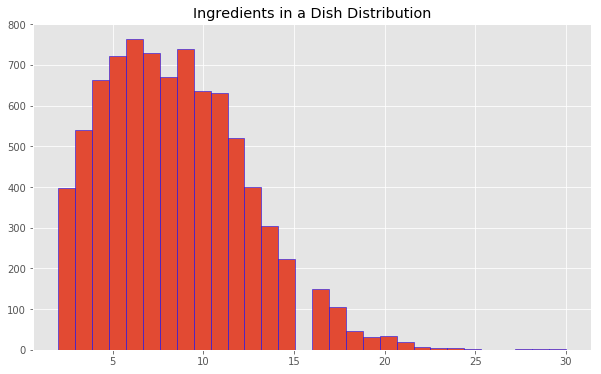

In [64]:
plt.hist(df_2['num_ingredients'],bins=max(df_2['num_ingredients']),edgecolor='b')
plt.gcf().set_size_inches(10,6)
plt.title('Ingredients in a Dish Distribution')

#### - Ingredients & Cusine: Top Cuisines

Text(0.5,1,'Cuisine Distribution')

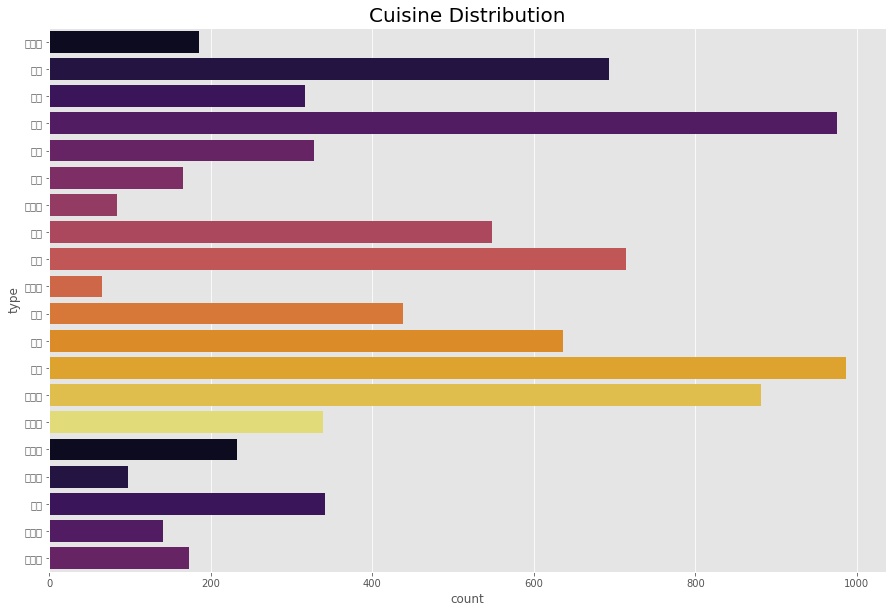

In [65]:
sns.countplot(y='type', data=df_2, palette=sns.color_palette('inferno',15))
plt.gcf().set_size_inches(15,10)
plt.title('Cuisine Distribution',size=20)

#### - Ingredients & Cusine:  Main Ingredients

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

Text(0.5,1,'Top 15 Ingredients')

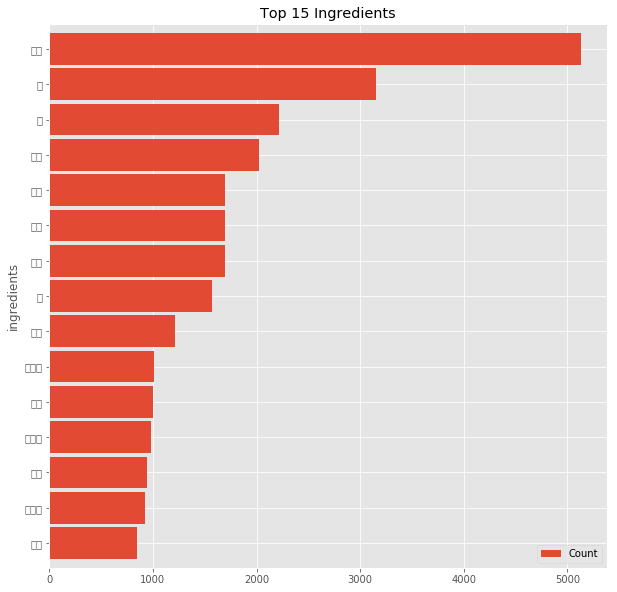

In [67]:
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x], lowercase=False)
counts = vec.fit_transform(df_2['ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['ingredients','Count'])
count.set_index('ingredients').sort_values('Count',ascending=False)[:15].plot.barh(width=0.9)
plt.gcf().set_size_inches(10,10)
plt.gca().invert_yaxis()
plt.title('Top 15 Ingredients')

In [456]:
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x], lowercase=False)
counts = vec.fit_transform(df_2['ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['ingredients','Count'])

In [468]:
count.to_excel('ingredient_count.xlsx',encoding='utf_8') 

#### - Taste & Cusine

In [123]:
from sklearn.preprocessing import minmax_scale
import numpy as np

In [30]:
gp = df_2.groupby(['type', 'taste'])
gp = gp.size()
newgp = gp.reset_index(name = 'times')
newgp

,type,taste,times
0,东北菜,咸&辣,1
1,东北菜,咸&香,344
2,东北菜,咸&鲜,434
3,东北菜,咸&麻,2
4,东北菜,甜,12
5,东北菜,甜&酸,32
6,东北菜,甜&香,7
7,东北菜,酸,22
8,东北菜,酸&辣,14
9,东北菜,香,9


In [31]:
for item in newgp.taste[newgp['taste'].str.contains("&")]:
    items = item.split("&")
    if len(items) == 2:
        a = newgp[(newgp.taste==str(item))].index[0]
        newgp['taste'].loc[a] = items[0]
        new_row={'type':newgp['type'].loc[a],'taste':items[1],'times':newgp['times'].loc[a]}
        newgp = newgp.append(new_row, ignore_index=True)
    if len(items) == 3:
        a = newgp[(newgp.taste==str(item))].index[0]
        newgp['taste'].loc[a] = items[0]
        new_row_1={'type':newgp['type'].loc[a],'taste':items[1],'times':newgp['times'].loc[a]}
        new_row_2={'type':newgp['type'].loc[a],'taste':items[2],'times':newgp['times'].loc[a]}
        newgp = newgp.append(new_row_1, ignore_index=True)
        newgp = newgp.append(new_row_2, ignore_index=True)

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [194]:
#newgp

In [121]:
newgp_2 = newgp.groupby(['type', 'taste']).sum()
newgp_2

times
type taste       
东北菜  咸        782
     甜         51
     辣         40
     酸         68
     香        382
     鲜        434
     麻          5
云贵菜  咸        108
     甜         11
     辣         65
     酸         21
     香         57
     鲜         89
     麻          9
京菜   咸        305
     甜         24
     辣         27
     酸         14
     香        166
     鲜        164
     麻          3
其它菜  咸        955
     甜         23
     辣         26
     酸         13
     香        913
     鲜         62
     麻          5
山西菜  咸        146
     甜          8
...           ...
西北菜  咸        264
     甜         26
     苦          4
     辣         39
     酸         12
     香         68
     鲜        227
     麻          8
豫菜   咸        134
     甜         17
     辣         15
     酸         15
     香         44
     鲜         95
     麻          4
闽菜   咸        561
     甜         46
     苦          2
     辣         36
     酸         27
     香        269
     鲜        333
     麻          7
鲁菜   咸        650
     甜         37
     辣         55
     酸         25
     香        389
     鲜        321
     麻         10

[155 rows x 1 columns]

In [84]:
newgp_s = newgp.groupby(['type']).sum()
newgp_s

,times
type,
东北菜,1762
云贵菜,360
京菜,703
其它菜,1997
山西菜,337
川菜,1988
广西菜,192
徽菜,622
江西菜,167


In [179]:
caixi_flavor = pd.pivot_table(newgp,index=["type"],columns=["taste"],values=["times"],
               aggfunc={"times":np.sum},fill_value=0)

In [201]:
caixi_flavor

times                               
taste     咸   甜  苦    辣   酸    香    鲜    麻
type                                      
东北菜     782  51  0   40  68  382  434    5
云贵菜     108  11  0   65  21   57   89    9
京菜      305  24  0   27  14  166  164    3
其它菜     955  23  0   26  13  913   62    5
山西菜     146   8  0   18   7   35  120    3
川菜      450  51  0  505  91  433  278  180
广西菜      80   3  2   11   6   14   72    4
徽菜      267  40  0   14  14   99  183    5
江西菜      66   2  1   14   6   35   42    1
沪菜      281  30  0   14  11   99  195    4
浙菜      488  55  0   22  24  222  290    5
清真菜     100  14  1   23  13   55   62    6
港台菜      52   5  0    9   3   21   38    2
湖北菜     186  13  2   29   9   50  162    6
湘菜      454  22  3  223  41  414  228   17
粤菜      875  80  2   43  43  330  585    3
苏菜      389  37  0   18  16  156  254    3
西北菜     264  26  4   39  12   68  227    8
豫菜      134  17  0   15  15   44   95    4
闽菜      561  46  2   36  27  269  333    7
鲁菜      650  37  0   55  25  389  321   10

In [180]:
for i in range(len(caixi_flavor)):
    total = newgp_s['times'][newgp_s.index==caixi_flavor.index[i]]
    total = int(total)
    for j in range(0,8):
        print(caixi_flavor.values[i][j])
        print(caixi_flavor.values[i][j]/total)
        caixi_flavor.values[i][j] = caixi_flavor.values[i][j].astype(float)

782
0.4438138479001135
51
0.02894438138479001
0
0.0
40
0.022701475595913734
68
0.03859250851305335
382
0.21679909194097616
434
0.246311010215664
5
0.0028376844494892167
108
0.3
11
0.030555555555555555
0
0.0
65
0.18055555555555555
21
0.058333333333333334
57
0.15833333333333333
89
0.24722222222222223
9
0.025
305
0.43385490753911804
24
0.034139402560455195
0
0.0
27
0.03840682788051209
14
0.01991465149359886
166
0.2361308677098151
164
0.2332859174964438
3
0.004267425320056899
955
0.4782173259889835
23
0.011517275913870806
0
0.0
26
0.013019529293940912
13
0.006509764646970456
913
0.45718577866800203
62
0.03104656985478217
5
0.0025037556334501754
146
0.4332344213649852
8
0.02373887240356083
0
0.0
18
0.05341246290801187
7
0.020771513353115726
35
0.10385756676557864
120
0.3560830860534125
3
0.008902077151335312
450
0.22635814889336017
51
0.025653923541247486
0
0.0
505
0.2540241448692153
91
0.045774647887323945
433
0.21780684104627768
278
0.1398390342052314
180
0.09054325955734406
80
0.41666666

In [208]:
caixi_flavor = pd.read_csv('/Users/heweiyuan/py/COM5508_Analytics/Group_project/new_trial_recipe/caixi_flavour.csv')
caixi_flavor

,咸,甜,苦,辣,酸,香,鲜,麻
东北菜,0.443814,0.028944,0.000000,0.022701,0.038593,0.216799,0.246311,0.002838
云贵菜,0.061294,0.006243,0.000000,0.036890,0.011918,0.032350,0.050511,0.005108
京菜,0.173099,0.013621,0.000000,0.015323,0.007946,0.094211,0.093076,0.001703
其它菜,0.541998,0.013053,0.000000,0.014756,0.007378,0.518161,0.035187,0.002838
山西菜,0.082860,0.004540,0.000000,0.010216,0.003973,0.019864,0.068104,0.001703
川菜,0.255392,0.028944,0.000000,0.286606,0.051646,0.245743,0.157775,0.102157
广西菜,0.045403,0.001703,0.001135,0.006243,0.003405,0.007946,0.040863,0.002270
徽菜,0.151532,0.022701,0.000000,0.007946,0.007946,0.056186,0.103859,0.002838
江西菜,0.037457,0.001135,0.000568,0.007946,0.003405,0.019864,0.023837,0.000568
沪菜,0.159478,0.017026,0.000000,0.007946,0.006243,0.056186,0.110670,0.002270


In [209]:
caixi_flavor = caixi_flavor.fillna(0.0)
for col in caixi_flavor.columns:
    caixi_flavor[col] = minmax_scale(caixi_flavor[col])+0.1
caixi_flavor

,咸,甜,苦,辣,酸,香,鲜,麻
东北菜,0.908416,0.728205,0.10,0.162500,0.838636,0.509344,0.100700,0.122346
云贵菜,0.162016,0.215385,0.10,0.212903,0.304545,0.147831,0.100090,0.144693
京菜,0.380177,0.382051,0.10,0.136290,0.225000,0.269077,0.100223,0.111173
其它菜,1.100000,0.369231,0.10,0.134274,0.213636,1.100000,0.100042,0.122346
山西菜,0.204097,0.176923,0.10,0.118145,0.145455,0.123359,0.100145,0.111173
川菜,0.540753,0.728205,0.10,1.100000,1.100000,0.566073,0.100424,1.100000
广西菜,0.131008,0.112821,0.60,0.104032,0.134091,0.100000,0.100060,0.116760
徽菜,0.338095,0.587179,0.10,0.110081,0.225000,0.194550,0.100256,0.122346
江西菜,0.115504,0.100000,0.35,0.110081,0.134091,0.123359,0.100007,0.100000
沪菜,0.353599,0.458974,0.10,0.110081,0.190909,0.194550,0.100278,0.116760


In [114]:
import random
from pyecharts import Timeline, Radar

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [215]:
timeline = Timeline(is_auto_play=True, timeline_bottom=0,timeline_symbol_size=6)
schema = [ (k0, 1.2) for k0 in caixi_flavor.columns]
for caixi0, row in caixi_flavor.iterrows():
    values0 = [row.values.tolist()]
    radar0 = Radar()
    radar0.config(schema, radar_text_size=16)
    color = "RGB(%d,%d,%d)" % (random.randint(0,255),random.randint(0,255),random.randint(0,255))
    radar0.add("", values0,legend_selectedmode='single',is_legend_show=False, is_area_show=True, area_color=color, area_opacity=0.5)
    timeline.add(radar0, caixi0)
timeline

### 3. Data Processing
#### - Similar to Dish No.1

In [58]:
ingreList = []
for index, row in df_2.iterrows():
    ingre = row['seg_ingres']
    
    for i in ingre:
        if i not in ingreList:
            ingreList.append(i)
def binary(ingre_list):
    binaryList = []
    
    for item in ingreList:
        if item in ingre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
df_2['bin ingredients']=df_2['seg_ingres'].apply(lambda x: binary(x))

In [65]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8298 entries, 0 to 9575
Data columns (total 16 columns):
Unnamed: 0               8298 non-null int64
name                     8298 non-null object
gy                       8298 non-null object
people                   4342 non-null object
taste                    8298 non-null object
cooking_time             8298 non-null object
type                     8298 non-null object
popular                  8298 non-null object
ingredient               8298 non-null object
comment                  8298 non-null int64
popularity               8298 non-null int64
seperated_ingredients    8298 non-null object
bin ingredients          8298 non-null object
ingredients              8298 non-null object
num_ingredients          8298 non-null int64
seg_ingres               8298 non-null object
dtypes: int64(4), object(12)
memory usage: 1.1+ MB


In [61]:
from scipy import spatial

def Similarity(Id1, Id2):
    a = df_2.iloc[Id1]
    b = df_2.iloc[Id2]
    
    A = a['bin ingredients']
    B = b['bin ingredients']
    distance=spatial.distance.cosine(A,B)
    
    return distance, Id2

In [64]:
df_2.iloc[1]

Unnamed: 0                                                               1
name                                                               宽汤羊肉揪面片
gy                                                                       煮
people                                                                 4人份
taste                                                                  咸&鲜
cooking_time                                                          60分钟
type                                                                   云贵菜
popular                                                     32 评论  6207 人气
ingredient               主料  饺子粉   羊肉   土豆   西红柿   胡萝卜  菠菜 干红辣椒 花椒 胡椒粉 ...
comment                                                                 32
popularity                                                            6207
seperated_ingredients          饺子粉,羊肉,土豆,西红柿,胡萝卜,菠菜,干红辣椒,花椒,胡椒粉,大蒜,葱,香菜,香醋
bin ingredients          [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, ...
ingredients              

In [66]:
food=[]
for i in range(8298):
    food.append(Similarity(1,i))
common_ingredients=sorted(food,key=lambda x: x[0])[1:10]
indexes=[]
for i in range(len(common_ingredients)):
    indexes.append(common_ingredients[i][1])
df_2.iloc[indexes]

,Unnamed: 0,name,gy,people,taste,cooking_time,type,popular,ingredient,comment,popularity,seperated_ingredients,bin ingredients,ingredients,num_ingredients,seg_ingres
1876,2523,酸辣双丝,烧,NaN,咸&香,60分钟,粤菜,1 评论 8523 人气,主料 马铃薯丁脱水 胡萝卜 柿子椒 葱 蒜,1,8523,"马铃薯丁脱水,胡萝卜,柿子椒,葱,蒜","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[马铃薯丁脱水, 胡萝卜, 柿子椒, 葱, 蒜]",5,"土豆 , 胡萝卜 , 青椒 , 大葱 , 蒜"
2751,4201,酸辣双丝,烧,NaN,咸&香,30分钟,江西菜,1 评论 8523 人气,主料 马铃薯丁脱水 胡萝卜 柿子椒 葱 蒜,1,8523,"马铃薯丁脱水,胡萝卜,柿子椒,葱,蒜","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[马铃薯丁脱水, 胡萝卜, 柿子椒, 葱, 蒜]",5,"土豆 , 胡萝卜 , 青椒 , 大葱 , 蒜"
5355,7778,蒜辣蔬菜煎,煎,NaN,香&辣,60分钟,苏菜,0 评论 2671 人气,主料 茄子 胡萝卜 马铃薯丁脱水 蒜 柿子椒 红尖椒 胡椒粉,0,2671,"茄子,胡萝卜,马铃薯丁脱水,蒜,柿子椒,红尖椒,胡椒粉","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, ...","[茄子, 胡萝卜, 马铃薯丁脱水, 蒜, 柿子椒, 红尖椒, 胡椒粉]",7,"茄子 , 胡萝卜 , 土豆 , 蒜 , 青椒 , 红尖椒 , 胡椒粉"
7799,11104,蒜泥白肉,其它工艺,NaN,咸&香,60分钟,东北菜,1 评论 4183 人气,主料 五花肉 葱 姜 蒜 胡萝卜 黄瓜 红尖椒 香菜 陈醋,1,4183,"五花肉,葱,姜,蒜,胡萝卜,黄瓜,红尖椒,香菜,陈醋","[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, ...","[五花肉, 葱, 姜, 蒜, 胡萝卜, 黄瓜, 红尖椒, 香菜, 陈醋]",9,"五花肉 , 大葱 , 姜 , 蒜 , 胡萝卜 , 黄瓜 , 红尖椒 , 香菜 , 陈醋"
8261,11672,扁豆莜面鱼鱼,煮,3人份,咸&鲜,60分钟,西北菜,4 评论 14320 人气,主料 莜面 羊肉 土豆 扁豆白 西红柿 色拉油 食盐 醋 葱 花椒粉 胡椒粉,4,14320,"莜面,羊肉,土豆,扁豆白,西红柿,色拉油,食盐,醋,葱,花椒粉,胡椒粉","[0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[莜面, 羊肉, 土豆, 扁豆白, 西红柿, 色拉油, 食盐, 醋, 葱, 花椒粉, 胡椒粉]",11,"莜面 , 羊肉 , 土豆 , 扁豆 , 西红柿 , 色拉油 , 食盐 , 醋 , 大葱 , ..."
7470,10775,老式锅包肉,炸,NaN,甜&酸,30分钟,东北菜,23 评论 3300 人气,主料 猪腿肉 地瓜粉 料酒 萝卜 香菜 大葱 蒜 糖 白醋 胡椒粉 盐,23,3300,"猪腿肉,地瓜粉,料酒,萝卜,香菜,大葱,蒜,糖,白醋,胡椒粉,盐","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, ...","[猪腿肉, 地瓜粉, 料酒, 萝卜, 香菜, 大葱, 蒜, 糖, 白醋, 胡椒粉, 盐]",11,"猪腿肉 , 红薯 , 料酒 , 白萝卜 , 香菜 , 大葱 , 蒜 , 白糖 , 醋 , 胡..."
7561,10866,东北乱炖,炖,3人份,咸&鲜,2小时,东北菜,37 评论 86831 人气,主料 猪大排 土豆 茄子紫皮长 胡萝卜 五花肉 柿子椒 卷心菜 粉条干 豆角...,37,86831,"猪大排,土豆,茄子紫皮长,胡萝卜,五花肉,柿子椒,卷心菜,粉条干,豆角,黑木耳,西红柿,食盐...","[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, ...","[猪大排, 土豆, 茄子紫皮长, 胡萝卜, 五花肉, 柿子椒, 卷心菜, 粉条干, 豆角, ...",20,"猪大排 , 土豆 , 茄子 , 胡萝卜 , 五花肉 , 青椒 , 卷心菜 , 粉条干 , 豇..."
8254,11665,羊肉粉汤,煮,3人份,咸&鲜,30分钟,西北菜,3 评论 10425 人气,主料 牛肉 羊肉 粉条干 豆腐 菠菜 西红柿 食盐 葱 姜 八角 料酒 生抽 胡...,3,10425,"牛肉,羊肉,粉条干,豆腐,菠菜,西红柿,食盐,葱,姜,八角,料酒,生抽,胡椒粉,香菜,陈醋","[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, ...","[牛肉, 羊肉, 粉条干, 豆腐, 菠菜, 西红柿, 食盐, 葱, 姜, 八角, 料酒, 生...",15,"牛肉 , 羊肉 , 粉条干 , 豆腐 , 菠菜 , 西红柿 , 食盐 , 大葱 , 姜 , ..."
8542,12009,葡萄干焖鸡块,焖,2人份,咸&鲜,15分钟,西北菜,0 评论 950 人气,主料 鸡肉 土豆 葡萄干 西红柿 柿子椒 麻色豌豆 芹菜 洋葱 食盐 植物油 大蒜 ...,0,950,"鸡肉,土豆,葡萄干,西红柿,柿子椒,麻色豌豆,芹菜,洋葱,食盐,植物油,大蒜,醋精,胡椒粉","[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, ...","[鸡肉, 土豆, 葡萄干, 西红柿, 柿子椒, 麻色豌豆, 芹菜, 洋葱, 食盐, 植物油,...",13,"鸡肉 , 土豆 , 葡萄干 , 西红柿 , 青椒 , 鲜豌豆 , 水芹菜 , 洋葱 , 食盐..."


####  - Top Bigrams by Cuisines

In [67]:
import nltk
from collections import Counter

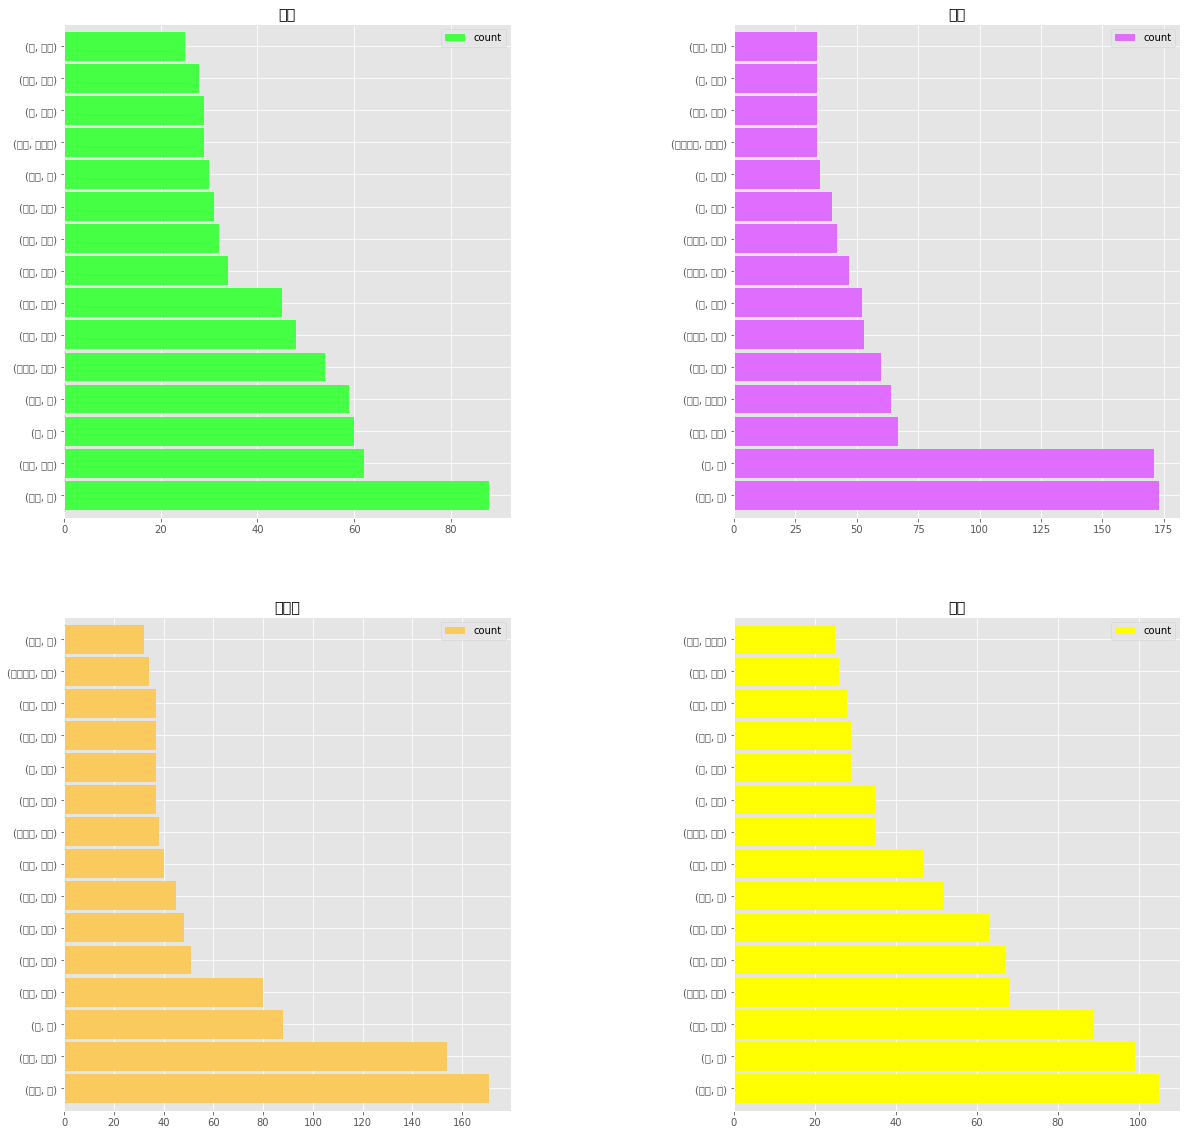

In [73]:
df_2['for ngrams']=df_2['seg_ingres'].str.replace(',',' ')
f,ax=plt.subplots(2,2,figsize=(20,20))
def ingre_cusine(cuisine):
    frame=df_2[df_2['type']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:15]
ingre_cusine('粤菜').plot.barh(ax=ax[0,0],width=0.9,color='#45ff45')
ax[0,0].set_title('粤菜')
ingre_cusine('川菜').plot.barh(ax=ax[0,1],width=0.9,color='#df6dfd')
ax[0,1].set_title('川菜')
ingre_cusine('东北菜').plot.barh(ax=ax[1,0],width=0.9,color='#fbca5f')
ax[1,0].set_title('东北菜')
ingre_cusine('湘菜').plot.barh(ax=ax[1,1],width=0.9,color='#ffff00')
ax[1,1].set_title('湘菜')
plt.subplots_adjust(wspace=0.5)

####  - Observe the similarity of different cuisines

In [99]:
import networkx as nx
def generate_ngrams(text, n):
    words = text.split(' ')
    iterations = len(words) - n + 1
    for i in range(iterations):
       yield words[i:i + n]
def net_diagram(*cuisines):
    ngrams = {}
    for title in df_2[df_2.type==cuisines[0]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df.columns = ['count']
    ngrams_mws_df['cusine'] = cuisines[0]
    ngrams_mws_df.reset_index(level=0, inplace=True)

    ngrams = {}
    for title in df_2[df_2.type==cuisines[1]]['for ngrams']:
            for ngram in generate_ngrams(title, 2):
                ngram = ','.join(ngram)
                if ngram in ngrams:
                    ngrams[ngram] += 1
                else:
                    ngrams[ngram] = 1

    ngrams_mws_df1 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_mws_df1.columns = ['count']
    ngrams_mws_df1['cusine'] = cuisines[1]
    ngrams_mws_df1.reset_index(level=0, inplace=True)
    cuisine1=ngrams_mws_df.sort_values('count',ascending=False)[:25]
    cuisine2=ngrams_mws_df1.sort_values('count',ascending=False)[:25]
    df_final=pd.concat([cuisine1,cuisine2])
    g = nx.from_pandas_edgelist(df_final,source='cusine',target='index')
    cmap = plt.cm.RdYlGn
    colors = [n for n in range(len(g.nodes()))]
    k = 0.35
    pos=nx.spring_layout(g, k=k)
    nx.draw_networkx(g,pos, node_size=df_final['count'].values*8, cmap = cmap, node_color=colors, edge_color='grey', font_size=15, width=3)
    plt.title("Top 25 Bigrams for %s and %s" %(cuisines[0],cuisines[1]), fontsize=30)
    plt.gcf().set_size_inches(30,30)
    plt.show()
    plt.savefig('network.png')

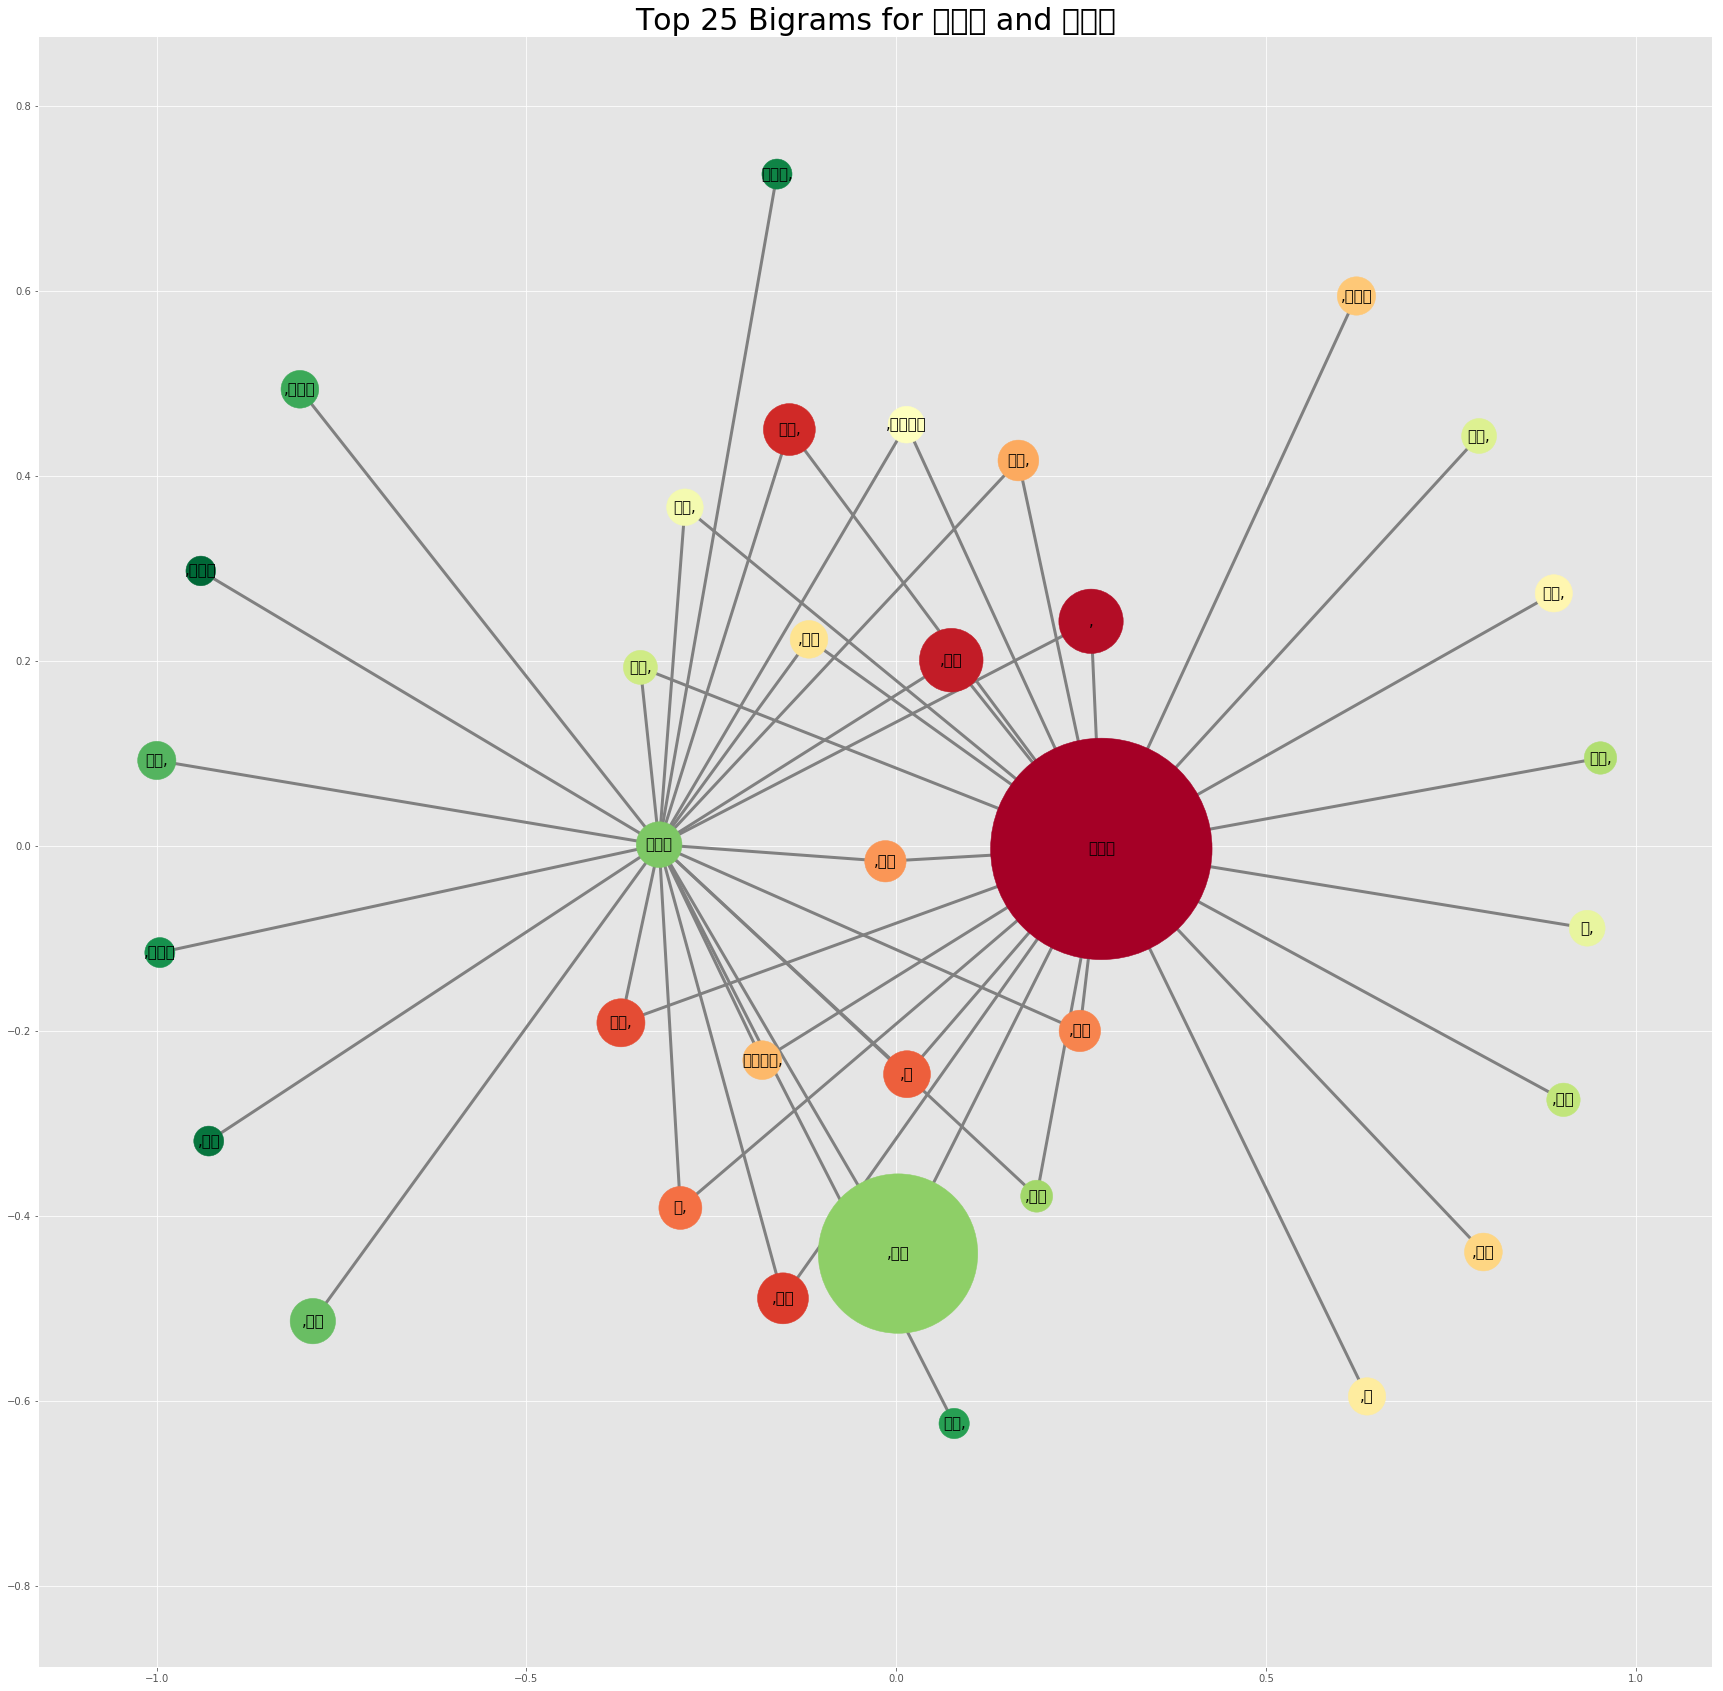

<Figure size 432x288 with 0 Axes>

In [101]:
net_diagram('东北菜','西北菜')

#### - Word Embedding
- Jieba Chinese Words Segementation
- TfidfVectorizer Ingredient Word Embedding
- LabelEncoder Type 

In [22]:
import jieba
df_2['jieba_ingre'] = None
texts = df_2.seperated_ingredients.tolist()
for i in range(9576):
    sentences = texts[i].split()
    sent_words = [list(jieba.cut(sent0)) for sent0 in sentences]
    document = [" ".join(sent0) for sent0 in sent_words]
    df_2['jieba_ingre'][i] = document
    print(document)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/cg/44l3_nn91yb6tj3fgnln14d40000gn/T/jieba.cache
Loading model cost 0.902 seconds.
Prefix dict has been built succesfully.
/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


['剁 椒 茉莉花 , 莲藕 , 胡萝卜 , 芹菜 , 黄瓜 , 鸡胸肉 , 小葱 , 蒜 , 姜 , 盐 , 酱油 , 蚝油 , 花椒油 , 鸡粉 , 白 胡椒粉']
['饺子 粉 , 羊肉 , 土豆 , 西红柿 , 胡萝卜 , 菠菜 , 干 红辣椒 , 花椒 , 胡椒粉 , 大蒜 , 葱 , 香菜 , 香醋']
['瘦肉 , 西红柿 , 青椒 , 酱油 , 料酒 , 淀粉 , 盐 , 姜末']
['鸡腿 , 火腿 , 鸡 枞菌 , 生姜 , 食盐 , 胡椒粉 , 八角 , 花椒 , 桂皮 , 香叶 , 干姜 , 陈皮 , 当归 , 水']
['肠粉 皮 , 鸡 枞油 , 大葱 , 酱油 , 醋 , 食盐 , 味精 , 五香粉 , 白芝麻 , 植物油 , 白糖 , 番茄酱']
['乌鳢 , 花生油 , 食盐 , 醋 , 姜 , 蒜 , 花椒 , 小米 椒 , 蒸鱼 豉油 , 胡椒 , 小葱']
['金针菇 , 肥牛 , 红尖椒 , 尖椒 , 食盐 , 鸡精 , 姜 , 蒜 , 植物油 , 水 , 红酸 汤']
['大米 , 土豆 , 食盐 , 植物油']
['乌骨鸡 , 虫草 花 , 芋头 , 食盐 , 葱 , 姜 , 黄酒']
['土豆 , 酸菜 , 胡萝卜 , 食盐 , 酱油 , 姜 , 蒜 , 八角 , 小米 椒 , 料酒 , 小葱 , 花椒粉 , 孜然 , 五香粉 , 植物油 , 辣椒粉']
['米线 , 牛肉 , 鸡腿 , 白萝卜 , 鸡蛋 , 香肠 , 黄瓜 , 胡萝卜 , 黑木耳 , 银耳 , 花生 , 圣女 果 , 尖椒 , 香菜 , 红尖椒 , 色拉油 , 食盐 , 醋 , 姜 , 八角 , 花椒 , 料酒 , 生抽 , 小葱 , 白糖 , 卤水 , 芝麻 , 鱼露']
['芝麻汤圆 , 腌 芥菜 , 鸡精 , 姜 , 蒜 , 植物油 , 蒜苗 , 白糖 , 辣椒油']
['鸡肉 , 香菇 , 蒜苗 , 食盐 , 葱 , 姜 , 蒜 , 干辣椒 , 料酒 , 生抽 , 植物油 , 剁 椒']
['鸡腿 , 卷心菜 , 尖椒 , 食盐 , 酱油 , 葱 , 蒜 , 花椒 , 干辣椒 , 香油 , 香菜 , 白糖 , 鱼露 , 江米酒 , 生粉 , 植物油']
['黑 芥 , 猪肉 馅 , 酱油 , 料酒 , 香油 , 红尖椒 , 尖椒 , 柿子椒 

['油豆腐 , 猪肉 馅 , 辣椒 , 盐 , 生抽 , 老抽 , 料酒 , 鸡蛋清 , 姜 , 葱 , 胡椒粉 , 冰糖']
['猪瘦肉 , 辣椒 , 大葱 , 芹菜 , 泡椒 , 姜蒜 , 洋葱']
['鱼头 , 油 , 剁 辣椒 , 盐 , 葱姜 蒜末 , 料酒 , 白 胡椒粉']
['红辣椒 , 红尖椒 , 盐']
['猪肉 肥瘦 , 螺丝 椒 , 葱白 , 蒜 , 料酒 , 蚝油 , 生抽 , 老抽 , 生粉 , 盐 , 鸡精']
['小八带 , 胡萝卜 , 大葱 , 姜 , 盐 , 油 , 小 油菜 , 料酒 , 香油 , 黑 胡椒粉 , 鸡蛋 , 香醋 , 淀粉 , 小葱']
['花菜 , 五花肉 , 油 , 盐 , 姜 , 蒜 , 辣椒 , 酱油']
['肉沫 , 虾仁 , 内酯 豆腐 , 蒸鱼 豉油 , 盐 , 料酒 , 葱花 , 高汤 , 榨菜']
['牛肉 , 小米 椒 , 芹菜 , 姜 , 蒜 , 泡椒']
['鸽子 , 莴笋 , 青椒 , 红椒 , 姜 , 葱 , 蒜 , 花椒 , 桂皮 , 草果 , 干辣椒 , 生抽 , 老抽 , 料酒 , 蚝油 , 盐 , 鸡精']
['鳙 鱼头 , 剁 辣椒 , 油 , 盐 , 剁 辣椒 , 葱姜 蒜末 , 料酒 , 白 胡椒粉']
['鱼头 , 油 , 盐 , 葱 , 姜 , 蒜 , 香油 , 剁 椒 调味汁 , 剁 辣椒']
['鱼头 , 剁 椒 , 葱 , 姜 , 生抽 , 花生油']
['五花肉 , 小辣椒 , 蒜 , 豆豉 , 料酒 , 酱油 , 油盐']
['鱼头 , 油 , 料酒 , 生抽 , 葱 , 剁 椒']
['仔鸡 , 姜 , 蒜 , 葱 , 淀粉 , 料酒 , 盐 , 生抽 , 胡椒粉 , 鸡蛋黄 , 干辣椒 , 青椒 , 绿 花椒 , 红 花椒 , 小米 椒 , 香菜']
['芋头 , 猪肉 馅 , 剁 辣椒 , 蒸鱼 豉油 , 生抽 , 蚝油 , 盐 , 葱姜 末']
['鸡蛋 , 红辣椒 , 食盐 , 蒜薹 , 辣 豆豉 , 淀粉 , 食用油 , 生抽 , 鸡粉']
['鱼头 , 剁 椒 , 蒜 , 姜片 , 葱花 , 料酒 , 胡椒粉 , 蒸鱼 豉油 , 蠔油 , 食用油']
['腊肠 , 大米 , 水 , 姜蓉 , 蒜蓉 , 葱花']
['腊肉 , 腊八 豆豉']
[

['酸菜 , 食盐 , 鸡精 , 姜 , 料酒 , 香菜 , 调和油']
['对虾 , 葱 , 姜 , 料酒']
['红椒 , 蒜 , 食盐 , 调和油 , 白酒']
['面粉 , 鸡蛋 , 食盐 , 小葱 , 食油']
['南瓜 , 面粉 , 食盐 , 白菜 , 鸡蛋 , 食油']
['萝卜干 , 杭椒 , 味精 , 葱 , 姜 , 调和油 , 元贞糖 , 胡椒粉']
['卷心菜 , 番茄酱 , 食盐 , 味精 , 葱 , 姜 , 蒜 , 柿子椒 , 调和油 , 胡椒粉']
['紫薯 , 糯米粉 , 水']
['莴笋 , 花生油 , 食盐 , 鸡精 , 葱 , 干辣椒']
['柿子椒 , 茄子 , 姜 , 食盐 , 生抽 , 调和油 , 十三 香 , 生粉']
['荷兰 乳牛 乳酪 牛奶 , 鸡蛋']
['小白菜 , 黑木耳 , 食盐 , 味精 , 蒜 , 柿子椒 , 调和油']
['面粉 , 酵母 干 , 荷兰 乳牛 乳酪 牛奶 , 枣干']
['卷心菜 , 香肠 , 花生油 , 食盐 , 姜 , 干辣椒 , 白酒']
['菜花 , 花生油 , 食盐 , 鸡精 , 核桃']
['江米酒 , 苹果 , 桂花 , 白糖']
['面粉 , 元贞糖 , 玉米油 , 红薯']
['黑木耳 , 洋葱 , 食盐 , 酱油 , 调和油']
['燕窝 , 西米 , 鸡蛋']
['凉薯 , 色拉油 , 食盐 , 花椒 , 生抽 , 淀粉 , 红椒']
['杏鲍菇 , 蒜 , 食盐 , 生抽 , 淀粉 , 食油']
['鸡蛋 , 柿子椒 , 红椒 , 食盐 , 生抽 , 水淀粉 , 食油']
['猪肝 , 淀粉 , 黑木耳 , 柿子椒 , 胡萝卜 , 泡 红椒']
['鸡蛋 , 淀粉 , 吉士 粉 , 黄油 , 白糖']
['鱼头 , 食盐 , 姜 , 蒜 , 料酒 , 剁 椒 , 调和油']
['大米 , 糯米 , 食盐 , 水 , 调和油']
['酸 萝卜 , 鱼头 , 食盐 , 姜 , 料酒 , 调和油 , 小葱 , 元贞糖 , 剁 椒']
['小白菜 , 食盐 , 调和油']
['鲢鱼 头 , 毛 豆腐 , 豆腐皮 , 生菜 , 食盐 , 鸡精 , 料酒 , 调和油 , 胡椒粉 , 柿子椒 , 枣鲜 , 西红柿 , 胡萝卜 , 火锅 底料']
['大闸蟹 , 米粉 , 食盐 

['鸡爪 , 南瓜 , 花生 鲜 , 旺旺 仙贝 , 食盐 , 葱 , 姜 , 生抽 , 老抽 , 辣椒粉 , 豆豉 , 白酒 , 白糖 , 水']
['澄粉 , 虾 , 五花肉 , 木耳 , 黄瓜 , 生粉 , 食用油 , 食盐 , 白糖 , 鸡精 , 白 胡椒粉 , 酱油 , 苏打粉 , 葱 , 姜']
['鲜 白果 , 腐竹 , 薏米 , 鹌鹑蛋 , 冰糖 , 水']
['大米 , 水 , 腊肠 , 香菇 , 菠菜 , 蚝油 , 生抽 , 食用油']
['猪 腿肉 , 咸鸭蛋 , 食盐 , 白 胡椒粉 , 生抽 , 姜 , 生粉']
['鸡 , 芝麻油 , 食盐 , 姜 , 枣干 , 干 金针 , 冬菇 干 , 生粉 , 生抽 , 水']
['腊鸭 , 腊肠 , 大米 , 西兰花 , 花生油 , 姜']
['五花肉 , 花生油 , 鸡粉 , 葱 , 姜 , 生抽 , 老抽 , 糟 豆腐乳 , 白酒 , 白糖']
['石斑鱼 , 食盐 , 小葱 , 蒸鱼 豉油 , 植物油']
['文昌鸡 , 植物油 , 食盐 , 姜 , 细 香葱 , 芝麻油 , 大葱 , 蚝油 , 白糖 , 生抽 , 蒜']
['鱿鱼干 , 五花肉 , 植物油 , 食盐 , 姜 , 香芹 , 红尖椒 , 鱼露 , 老抽 , 生抽 , 江米酒']
['豆腐 , 猪肉 , 植物油 , 食盐 , 姜 , 红 葱头 , 胡椒粉 , 玉米 淀粉 , 老抽 , 蚝油 , 白糖 , 生抽 , 高汤']
['鸡 , 水 , 食盐 , 葱油 , 小葱 , 姜']
['猪蹄 , 姜 , 甜醋 , 鸡蛋 , 盐 , 醋']
['姜 , 猪蹄 , 鸡蛋 , 甜醋']
['猪蹄 , 鸡蛋 , 姜 , 甜醋 , 红糖']
['梅花 肉 , 红曲米 , 食盐 , 葱 , 姜 , 蒜 , 生抽 , 蚝油 , 淀粉 , 麦芽糖 , 柱候 酱 , 海鲜 酱 , 磨豉 酱 , 白糖 , 玫瑰露 酒']
['公鸡 , 红 葱头 , 食盐 , 姜 , 蒜 , 蚝油 , 淀粉 , 黄酒 , 细 香葱 , 香菜 , 植物油 , 柱候 酱 , 海鲜 酱']
['豆腐 , 猪肉 肥瘦 , 香菇 干 , 花生油 , 葱 , 生抽 , 淀粉 , 芝麻油 , 白糖 , 水']
['西红柿 , 牛肉 , 鸡蛋 , 食盐 , 葱 , 姜 , 淀粉 , 

['猪蹄 , 火腿 , 花生 , 长思 水晶 蜜枣']
['蘑菇 , 马铃薯 丁 脱水 , 西红柿 , 卷心菜 , 食盐']
['四季豆 , 叉烧 肉 , 辣椒粉']
['海带 , 虾 , 姜']
['水面 筋 , 毛豆 , 酱油 , 芝麻油']
['芦笋 , 食盐 , 鸡精 , 黄油']
['苦瓜 , 干贝 素']
['鲜贝 , 火龙果 , 荷兰豆']
['毛 豆腐 , 豆瓣 辣酱']
['藜 蒿 , 金针菇']
['松花蛋 , 食盐 , 大米 , 橄榄油']
['橙 , 食盐 , 酱油 , 鸡粉 , 料酒 , 元贞糖']
['竹笋 , 芦笋']
['香菇 , 火腿 , 芹菜 , 牛肚']
['鱿鱼 , 八角 , 生抽 , 海鲜 酱 , 香叶 , 烧烤 汁']
['黄瓜 , 料酒 , 番茄酱 , 松子 , 白糖']
['马铃薯 丁 脱水 , 金糕 , 元贞糖 , 奶粉 , 调和油']
['鸡腿 , 食盐 , 干辣椒 , 老抽 , 蚝油 , 胡萝卜']
['蛏子 , 食盐 , 生抽 , 粉丝 , 柿子椒 , 红椒']
['苦瓜 , 猪大排']
['南瓜 , 南 豆腐']
['大米 , farmer , john 香肠']
['四季豆 , 猪肉 , 花生油 , 食盐 , 酱油 , 鸡精 , 料酒 , 淀粉 , 元贞糖']
['面粉 , 淡 奶油 , 白糖']
['面粉 , 鸡蛋 , 元贞糖 , 荷兰 乳牛 乳酪 牛奶']
['粳米 标一 , 冰糖 , 黑木耳']
['猪蹄 , 料酒 , 植物油 , 水 , 莲子 , 枣鲜']
['米饭 , 黄瓜 , 苹果']
['五花肉 , 食盐 , 八角 , 花椒 , 干辣椒 , 泡 红椒 , 香叶 , 白糖']
['鸡蛋 , 食盐 , 黄油 , 水 , 高筋 面粉 , 奶粉 , 元贞糖 , 糖粉 , 低筋 面粉 , 蜜豆']
['鸡肉 , 莲子 , 姜 , 水']
['猪大排 , 叉烧 酱 , 酱油 , 醋 , 葱 , 姜 , 蒜 , 料酒 , 长寿 深 山野 蜜 , 白芝麻']
['山药 , 枣鲜 , 桂圆']
['梅头 肉 , 酱油 , 丁香 鱼 , 白糖 , 调和油 , 水']
['蜂蜜 , 水']
['茄子 , 干贝 , 葱 , 蒜 , 料酒 , 生抽 , 蚝油 , 风轮 草 , 调和油 , 芝麻油 , 白糖']
['猪大

['芋头 , 虾皮 , 食盐 , 酱油 , 蒜 , 调和油']
['毛豆 , 姜 , 料酒 , 调和油 , 白糖']
['猪大排 , 醋 , 姜 , 料酒 , 老抽 , 芝麻 , 红糖 , 柿子椒']
['毛 豆腐 , 鱼籽 , 食盐 , 醋 , 姜 , 调和油']
['野蒜 , 虾皮 , 鸡蛋 , 食盐 , 料酒 , 淀粉 , 调和油']
['乐惠 紫菜汤 海鲜 味 , 食盐 , 调和油']
['杏鲍菇 , 肉丸 , 食盐 , 蒜 , 调和油']
['馄饨 皮 , 五花肉 , 食盐 , 酱油 , 醋 , 味精 , 香菇 , 乐惠 紫菜汤 海鲜 味 , 虾皮']
['毛 豆腐 , 食盐 , 酱油 , 花椒粉']
['面条 生 , 菠菜']
['羊肉 , 食盐 , 葱 , 胡椒粉 , 香菜']
['菠菜 , 粉皮']
['西米 , 椰子 , 元贞糖 , 水']
['白萝卜 , 长寿 深 山野 蜜']
['豌豆苗 , 食盐 , 蒜 , 鸡蛋 , 调和油']
['米饭 , 鸡蛋 , 火腿 , 咸菜']
['猪大排 , 南瓜 , 豆豉']
['面粉 , 食盐 , 鸡蛋']
['西兰花 , 黑木耳 , 胡萝卜']
['猪 尾巴 , 猪蹄 , 山药 , 八角']
['毛豆 , 柿子椒 , 食盐 , 酱油 , 鸡精 , 料酒 , 元贞糖']
['冰淇淋 , 淡 奶油 , 白糖 , 水 , 奶粉 , 玉米 淀粉']
['面粉 , 豆沙']
['带鱼 , 食盐 , 料酒 , 面粉']
['番茄酱 , 火腿']
['扁豆 , 蒜 , 柿子椒']
['花生 , 黑豆 , 水 , 元贞糖']
['黄鱼 , 酱油 , 姜 , 红尖椒 , 调和油']
['紫 甘蓝 , 食盐 , 香菜']
['丝瓜 , 虾皮']
['雪里蕻 , 毛豆 , 食盐 , 元贞糖']
['鸡心 , 食盐 , 生抽 , 蚝油 , 五香粉']
['玉米面 黄 , 猪肉 , 卷心菜 , 食盐 , 姜 , 生抽 , 蚝油 , 朝天椒 , 植物油']
['荷兰 乳牛 乳酪 牛奶 , 白糖 , 樱桃']
['玉米 , 番茄酱 , 火龙果 , 南山 益生菌 酸奶']
['樱桃 , 麦芽糖 , 白糖 , 红酒']
['鸡腿 , 花生油 , 酱油']
['胡萝卜 , 黄瓜 , 香蕉 , 洋葱']
['奶白菜 , 咸鸭蛋']
['菠萝 ,

['猪蹄 筋 , 面粉 , 鸡蛋黄 , 酵母 干 , 碱 , 花生油 , 食盐 , 味精 , 黄酒']
['鸡蛋 , 猪 里脊肉 , 荠菜 , 香菇 , 春笋 , 面粉 , 玉米 淀粉 , 碱 , 花生油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 料酒']
['猪肉 , 鸡蛋清 , 淀粉 , 冰糖 , 白糖 , 芝麻 , 植物油']
['泥鳅 , 食盐 , 醋 , 鸡精 , 葱 , 姜 , 料酒 , 老抽 , 香菜 , 泡 红椒 , 花椒粉 , 白糖 , 植物油 , 高汤']
['虾 , 胡萝卜 , 香菜 , 芹菜 , 虾米 , 鱿鱼干 , 食盐 , 酱油 , 葱 , 姜 , 生抽 , 老抽 , 玫瑰 酒']
['鸭肉 , 口蘑 , 火腿 , 冬菇 干 , 冬笋 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 料酒 , 高汤']
['鲅鱼 , 尖椒 , 色拉油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 蒜 , 老抽 , 白糖 , 白酒 , 胡椒粉 , 高汤']
['五花肉 , 食盐 , 酱油 , 葱 , 姜 , 八角 , 料酒 , 腐乳 红 , 白砂糖']
['鸭肉 , 豆油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 花椒 , 料酒 , 豌豆 淀粉 , 白砂糖 , 糖色']
['猪蹄 筋 , 蟹黄 , 花生油 , 酱油 , 味精 , 葱 , 姜 , 大蒜 , 黄酒 , 白砂糖 , 玉米 淀粉 , 葱油']
['猪肉 , 虾米 , 白菜 , 香菜 , 鸡蛋 , 食盐 , 醋 , 味精 , 葱 , 姜 , 香油 , 胡椒粉']
['羊肚 , 香菜 , 花生油 , 食盐 , 味精 , 葱 , 姜 , 料酒 , 香油 , 大蒜']
['猪腰 , 香菜 , 食盐 , 酱油 , 醋 , 味精 , 葱 , 姜 , 料酒 , 香油 , 大蒜 , 植物油']
['羊 里脊肉 , 鸡蛋清 , 淀粉 , 花生油 , 椒盐']
['皮皮虾 , 八角 , 香叶 , 桂皮 , 葱 , 姜 , 酱油 , 味精 , 鸡粉 , 白糖 , 胡椒粉 , 白酒']
['菠菜 , 羊肝 , 色拉油 , 食盐 , 酱油 , 醋 , 味精 , 料酒']
['猪 里脊肉 , 麻色 豌豆 , 鸡蛋清 , 玉米 淀粉 , 食盐 , 味精 , 姜 , 植物油 , 小葱 , 苏打粉 , 大蒜']

['白鱼 , 酸菜 , 鸡精']
['羊排 , 菠菜 , 面条 生']
['带鱼 , 八角 , 干辣椒 , 料酒 , 白菜']
['牛肉 , 拉面 , 香菜']
['鸡蛋 , 老抽']
['牛肚 , 葱 , 蒜 , 芝麻油']
['马铃薯 丁 脱水 , 醋 , 干辣椒']
['面条 生 , 鸡蛋']
['牡蛎 , 毛 豆腐']
['西葫芦 , 鸡蛋']
['生菜 , 干辣椒']
['菠菜 , 黄瓜 , 金针菇 , 芝麻油']
['扁豆 , 生抽 , 五花肉']
['平菇 , 五花肉']
['金针菇 , 粉丝']
['牛肉 , 海带 , 黑木耳 , 火锅 底料']
['豆腐干 , 黄瓜 , 香菜']
['低筋 面粉 , 黄油 , 椰奶 , 鸡蛋 , 元贞糖 , 椰丝']
['羊肉 , 食盐 , 葱 , 胡椒粉 , 香菜']
['菠菜 , 粉皮']
['紫薯 , 元贞糖 , 面粉 , 调和油']
['香菜 , 毛 豆腐']
['西瓜 , 苹果 , 南山 益生菌 酸奶 , 沙拉酱']
['腊肉 , 柿子椒 , 洋葱 , 郫县 豆瓣酱 , 白糖']
['羊肉片 , 粉丝 , 饺子皮 , 北极 虾 , 乐惠 紫菜汤 海鲜 味']
['芋头 , 大米 , 生抽']
['豌豆苗 , 食盐 , 蒜 , 鸡蛋 , 调和油']
['猪大排 , 南瓜 , 豆豉']
['面粉 , 食盐 , 鸡蛋']
['虾 , 黄豆芽 , 胡萝卜']
['鸡肉 , 枣鲜']
['白虾 , 食盐']
['虾酱 , 鸡蛋 , 水']
['粳米 标一 , 豇豆 , 香菇']
['糯米 , 食盐']
['猪大肠 , 花生油 , 食盐 , 生抽 , 柿子椒']
['玉米面 黄 , 荷兰 乳牛 乳酪 牛奶 , 香蕉 , 泡打粉']
['蛏子 , 食盐 , 酱油 , 蒜 , 黄瓜 , 芝麻油']
['面粉 , 生抽 , 小白菜']
['挂面 , 鸡蛋 , 小白菜']
['玉米面 黄 , 食盐 , 面粉 , 芹菜 , 泡打粉']
['玉米 , 食盐 , 白糖']
['南瓜 , 食盐 , 白糖']
['藕 , 干辣椒 , 胡萝卜']
['野菜 , 虾皮']
['酸 萝卜 , 虾皮 , 火腿']
['丝瓜 , 黄瓜 , 胡萝卜 , 香菇']
['菠菜 , 蒜 , 粉丝 , 金糕 , 芝麻油']
['山药 , 胡萝卜 , 黑木

['芹菜 , 猪肉 , 虾米 , 面粉 , 鸡蛋 , 花生油 , 食盐 , 酱油 , 葱 , 姜 , 蚝油 , 五香粉']
['黄瓜 , 蒜 , 豆油 , 酱油 , 料酒 , 白糖']
['草鱼 , 食盐 , 鸡精 , 姜 , 蒜 , 料酒 , 老抽 , 五香粉 , 白糖 , 调和油 , 水']
['鸡蛋 , 番茄酱 , 食盐 , 芝麻油']
['鸡腿 , 花生油 , 姜 , 料酒 , 头 抽']
['番茄酱 , 鸡蛋 , 香肠 , 食盐 , 葱 , 姜 , 料酒 , 淀粉 , 调和油 , 胡椒粉 , 白糖 , 香菜']
['番茄酱 , 鸡蛋 , 米饭 , 食盐 , 调和油 , 黄瓜']
['番茄酱 , 调和油 , 鸡蛋']
['冬瓜 , 香菇 , 枝竹 , 食盐']
['黄瓜 , 淀粉 , 食盐 , 酱油']
['黄瓜 , 食盐 , 酱油 , 葱 , 调和油']
['黄瓜 , 胡萝卜 , 花生油 , 食盐 , 葱 , 姜 , 淀粉']
['猪腰 , 黄瓜 , 花生油 , 食盐 , 葱 , 姜 , 水淀粉 , 胡椒粉 , 白酒']
['黄瓜 , 食盐 , 醋 , 蚝油 , 辣椒油 , 金针菇']
['黄瓜 , 杏鲍菇 , 花生油 , 食盐 , 葱 , 姜 , 水淀粉']
['青豆 , 黄瓜 , 对虾 , 花生油 , 食盐 , 葱 , 姜']
['茄子 , 鸡蛋 , 食盐 , 姜 , 蒜 , 料酒 , 蚝油 , 番茄酱 , 调和油 , 面粉 , 洋葱 , 芝麻油']
['茄子 , 食盐 , 鸡精 , 八角 , 花椒 , 调和油 , 香菜']
['茄子 , 香菜 , 食盐 , 八角 , 调和油 , 花椒粉']
['茄子 , 食盐 , 酱油 , 调和油 , 剁 椒 , 五花肉']
['丝瓜 , 鸡蛋 , 食盐']
['毛 豆腐 , 花生油 , 食盐 , 鸡精 , 葱 , 干辣椒 , 虾皮 , 五花肉']
['毛 豆腐 , 花生油 , 食盐 , 醋 , 淀粉 , 元贞糖 , 水']
['毛 豆腐 , 食盐 , 姜 , 豆瓣酱 , 调和油']
['毛 豆腐 , 食盐 , 姜 , 鸡蛋 , 水']
['五花肉 , 雪里蕻 , 黄豆 , 食盐 , 味精 , 调和油']
['紫石房 蛤 , 韭菜 , 五花肉 , 饺子皮 , 食盐 , 料酒 , 调和油 , 白胡椒']
['五花肉 ,

['鲤鱼 , 鸡蛋清 , 粳米 标一 , 食盐 , 味精 , 葱 , 淀粉 , 黄酒 , 白胡椒 , 椒盐']
['鮰 鱼 , 春笋 , 食盐 , 葱 , 姜 , 黄酒 , 猪油 板油 , 江米酒 , 高汤 , 白胡椒']
['青鱼 , 莴笋 , 冬菇 干 , 豆油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 清汤 , 黄酒']
['鳜鱼 , 猪肉 , 冬菜 , 莴笋 , 鸡蛋 , 食盐 , 味精 , 葱 , 姜 , 淀粉 , 猪油 板油 , 黄酒 , 椒盐 , 芝麻油']
['猪 腿肉 , 水面 筋 , 食盐 , 味精 , 葱 , 姜 , 淀粉 , 黄酒 , 白糖 , 水']
['猪肉 , 豌豆苗 , 粳米 标一 , 色拉油 , 酱油 , 味精 , 葱 , 姜 , 料酒 , 清汤 , 绵白糖 , 猪油 板油']
['鲍鱼 , 鸡翅 , 卷心菜 , 色拉油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 料酒 , 水淀粉 , 白糖 , 高汤']
['鲍鱼 , 白萝卜 , 蒸鱼 豉油']
['猪肚 , 花生 炒 , 柿子椒 , 红椒 , 食盐 , 酱油 , 蒜 , 辣椒油 , 细 香葱 , 白糖 , 花椒油 , 鲜味 汁 , 芝麻油 , 陈醋']
['猪蹄 , 葱 , 姜 , 八角 , 花椒 , 料酒 , 粗盐 , 水']
['鸡 胸脯 肉 , 色拉油 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 料酒 , 生抽 , 淀粉 , 番茄酱 , 白糖 , 芝麻']
['鸭肉 , 火腿 , 冬笋 , 食盐 , 葱 , 姜 , 啤酒 , 胡椒粉']
['鱼翅 , 火腿 , 鸡 胗 , 虾仁 , 油菜 苔 , 冬笋 , 鸡 胸脯 肉 , 香菇 , 鸡腿 , 猪肉 , 食盐 , 姜 , 猪油 板油 , 黄酒 , 小葱']
['鸭肉 , 冰糖 , 葱 , 姜 , 八角 , 花椒 , 桂皮 , 料酒 , 老抽 , 草果 , 香叶 , 茴香 , 甘草']
['鸡 胸脯 肉 , 姜 , 鸡蛋清 , 食盐 , 味精 , 淀粉 , 黄酒 , 芝麻油 , 猪油 板油']
['草鱼 , 红尖椒 , 芹菜 , 色拉油 , 食盐 , 姜 , 蒜 , 花椒 , 料酒 , 老抽 , 辣椒酱']
['五花肉 , 卷心菜 , 酱油 , 黄酒 , 冰糖 , 食盐 , 葱 , 姜 , 水淀粉 , 味精

['墨鱼 , 豆腐 丝 , 食盐 , 味精 , 葱 , 姜 , 蒜 , 柿子椒 , 元贞糖 , 胡椒粉 , 胡萝卜']
['馒头 , 色拉油 , 食盐 , 胡椒粉 , 马铃薯 丁 脱水 , 鸡蛋 , 黄油 , 西红柿 , 柿子椒']
['香椿 , 胡萝卜 , 食盐 , 鸡精 , 淀粉 , 元贞糖 , 胡椒粉']
['毛 豆腐 , 蒜苔 , 食盐 , 味精 , 葱 , 姜 , 蒜 , 柿子椒 , 调和油 , 胡椒粉']
['毛 豆腐 , 冬菜 , 食盐 , 鸡精 , 生抽']
['糯米 , 猪肉 , 馄饨 , 食盐 , 生抽 , 蚝油 , 香油 , 淀粉 , 干 香菇 , 十三 香 , 胡萝卜']
['虾 , 醋 , 葱 , 姜 , 蒜 , 小米 椒 , 料酒 , 生抽 , 白砂糖']
['五花肉 , 荷叶 , 香米 , 食盐 , 酱油 , 花椒 , 黄酒 , 胡椒 , 辣椒粉']
['大闸蟹 , 食盐 , 酱油 , 冰糖 , 姜 , 蒜 , 花椒 , 料酒']
['鳝鱼 , 香菜 , 色拉油 , 食盐 , 酱油 , 味精 , 料酒 , 香油 , 水淀粉 , 蒜泥 , 白糖 , 胡椒粉']
['虾仁 , 鸡蛋清 , 花生油 , 食盐 , 醋 , 味精 , 姜 , 料酒 , 香油 , 胡椒粉 , 豌豆 淀粉']
['青鱼 , 胡萝卜 , 柿子椒 , 花生油 , 食盐 , 酱油 , 醋 , 味精 , 葱 , 姜 , 干辣椒 , 料酒 , 白砂糖 , 玉米 淀粉']
['五花肉 , 酱油 , 姜 , 料酒 , 香糟 , 白砂糖 , 小葱']
['带鱼 , 酱油 , 醋 , 鸡精 , 葱 , 姜 , 料酒 , 白糖 , 植物油']
['羊肉 , 豆腐皮 , 食盐 , 冰糖 , 葱 , 姜 , 八角 , 桂皮 , 料酒 , 香油 , 碱 , 植物油 , 红曲 粉']
['南 豆腐 , 海参 , 虾米 , 鸡 胸脯 肉 , 蘑菇 , 干贝 , 青蒜 , 食盐 , 味精 , 葱 , 姜 , 料酒 , 香油 , 玉米 淀粉']
['母鸡 , 猪肉 , 鸡 胗 , 虾仁 , 香菇 , 火腿 , 食盐 , 酱油 , 葱 , 姜 , 八角 , 香油 , 甜面酱 , 猪 网油 , 小葱 , 丁香 , 黄酒 , 肉豆蔻 , 白砂糖 , 猪油 板油']
['冬瓜 , 猪肉 , 虾米 , 香菇 ,

['调和油 , 食盐 , 料酒 , 蒸鱼 豉油']
['鸡心 , 食盐 , 鸡精 , 姜 , 料酒 , 老抽 , 元贞糖 , 胡椒粉']
['鱼丸 , 黑木耳 , 葱 , 姜']
['梨 , 果汁']
['西兰花 , 胡萝卜 , 洋葱 , 腊肉 , 米饭']
['猪肝 , 红尖椒 , 洋葱 , 姜 , 干辣椒 , 淀粉 , 白糖']
['鸡蛋 , 洋葱']
['大闸蟹 , 食盐 , 酱油 , 醋 , 调和油']
['娃娃 菜 , 番茄酱 , 食盐 , 鸡精 , 调和油']
['五花肉 , 土豆 , 食盐 , 鸡精 , 姜 , 八角 , 料酒 , 老抽 , 元贞糖 , 柿子椒 , 香叶']
['绿豆芽 , 鸡蛋 , 红椒']
['鹌鹑蛋 , 冰糖 , 姜 , 八角 , 桂皮 , 香叶']
['五花肉 , 春笋 , 鸡精 , 蒜 , 料酒']
['咸肉 , 鸡腿菇 , 野山 椒 , 花生油 , 葱 , 姜 , 蒜 , 生抽 , 老抽']
['卷心菜 , 食盐 , 虾 , 白糖 , 调和油']
['芹菜 叶 , 食盐 , 粉丝 , 胡萝卜']
['白菜 , 食盐 , 味精 , 老抽 , 调和油']
['西瓜皮 , 食盐 , 鸡精 , 葱 , 元贞糖 , 柿子椒 , 芝麻油 , 胡椒粉']
['菜花 , 猪肚 , 食盐 , 鸡精 , 蚝油 , 调和油']
['毛 豆腐 , 五花肉 , 食盐 , 鸡精 , 蚝油 , 调和油 , 芥菜']
['胡萝卜 , 鸡蛋 , 食盐 , 蚝油 , 淀粉 , 调和油 , 元贞糖 , 黄酒 , 胡椒粉 , 面包 糠']
['油豆腐 , 苦瓜 , 食盐 , 蒜 , 调和油 , 元贞糖']
['笋干 , 食盐 , 蚝油 , 调和油 , 元贞糖 , 五花肉 , 酸菜']
['米饭 , 紫薯 , 调和油 , 元贞糖 , 沙拉酱 , 面包 糠']
['芥菜 , 食盐 , 酱油 , 鸡精 , 料酒 , 调和油 , 元贞糖']
['酸 萝卜 , 食盐 , 鸡精']
['鸡 胸脯 肉 , 食盐 , 鸡精 , 料酒 , 老抽 , 调和油 , 胡椒粉']
['鲈鱼 , 食盐 , 葱 , 姜 , 调和油']
['鹌鹑蛋 , 食盐 , 水淀粉 , 番茄酱 , 调和油']
['猪肝 , 彩椒 , 食盐 , 姜 , 料酒 , 生抽 , 调和油 , 鸡汁']
['花生 , 

['里脊肉 , 胡萝卜 , 木耳 , 大蒜 , 葱 , 玉米 淀粉 , 生抽 , 盐 , 香醋 , 白糖 , 豆瓣酱']
['五花肉 , 青蒜 , 青椒 , 郫县 豆瓣酱 , 白糖 , 生抽 , 盐 , 泡 姜 , 泡椒']
['五花肉 , 洋葱 , 胡萝卜 , 青椒 , 鲜味 酱油 , 郫县 豆瓣酱 , 老抽 , 鸡精 , 牛肉 粉']
['豆腐 , 油 , 盐 , 花椒 , 胡椒粉 , 姜蒜 葱 , 白糖 , 老抽 , 淀粉 , 郫县 豆瓣']
['瘦肉 , 黄瓜 , 花生 炒 , 色拉油 , 盐 , 豆瓣酱 , 淀粉 , 蒜苗 , 生抽 , 干辣椒']
['五花肉 , 花生油 , 蒜瓣 , 干 红辣椒 , 花椒 , 精盐 , 酱油 , 料酒 , 郫县 豆瓣酱 , 葱 , 姜 , 绵白糖 , 八角']
['五花肉 , 蒜苗 , 青椒 , 红椒 , 郫县 豆瓣酱 , 豆豉 , 糖']
['五花肉 , 蒜苗 , 郫县 豆瓣酱 , 豆豉 , 甜面酱 , 猪油 , 菜籽油 , 小葱 , 生姜 , 花椒 , 清水']
['猪 里脊肉 , 胡萝卜 , 木耳 , 辣椒 , 白糖 , 食盐 , 郫县 豆瓣酱 , 醋 , 生抽 , 料酒 , 葱 , 姜 , 蒜 , 植物油 , 淀粉']
['豆腐 , 猪肉 瘦 , 油 , 青蒜 , 蒜 , 洋葱 , 盐 , 料酒 , 姜 , 葱 , 白糖 , 生抽 , 淀粉 , 郫县 豆瓣']
['嫩豆腐 , 小葱 , 花椒粉 , 郫县 豆瓣 , 酱油']
['猪肉 瘦 , 年糕 , 鸡腿菇 , 烤肠 , 毛肚 梗 , 黄瓜 , 土豆 , 山药 , 豆腐皮 , 豆干 , 油豆腐 , 郫县 豆瓣 , 独 大蒜 , 菜籽油 , 牛油 , 小葱 , 泡 姜 , 泡椒 小米 辣 , 干辣椒 , 花椒 , 芝麻 , 料酒 , 白糖 , 老姜']
['蛾眉 豆 , 蒜瓣 , 肉末 , 盐 , 油 , 辣椒 , 蚝油 , 香油']
['牛 里脊 , 黄豆芽 , 粉丝 , 葱 , 大蒜 头 , 花椒 , 干辣椒 , 淀粉 , 油 , 生抽 , 辣椒酱']
['豆腐 , 豆鼓 , 八角 , 香蒜 , 肉 , 辣椒油 , 白果 , 花椒 , 桂皮 , 姜']
['鸡腿 , 油 , 花椒 , 白糖 , 白醋 , 干辣椒 , 盐 , 淀粉 , 料酒 , 生姜 , 大葱 

['高筋 面粉 , 鸡蛋 , 食盐 , 荷兰 乳牛 乳酪 牛奶 , 白糖 , 酵母 干 , 抹 茶粉']
['鸡肉 , 食盐 , 黄酒']
['番茄酱 , 洋葱 , 食盐 , 八角 , 桂皮 , 料酒 , 卷心菜 , 马铃薯 丁 脱水 , 芹菜 , 香菜 , 香叶']
['香肠 , 鸡蛋 , 节瓜']
['葱 , 料酒 , 生抽']
['玉米面 黄 , 食盐 , 豆渣 , 五香粉']
['乌梅 , 冰糖 , 玫瑰 茄 , 水']
['猪肚 , 食盐 , 酱油 , 鸡精 , 姜 , 八角 , 花椒 , 料酒']
['洋葱 , 酱油 , 酸菜 , 水 , 白糖']
['培根 , 食盐 , 黄油 , 水 , 奶粉 , 沙拉酱 , 元贞糖 , 酵母 干']
['猪大排 , 葱 , 姜 , 蒜']
['马铃薯 丁 脱水 , 蒜 , 彩椒']
['鸡蛋 , 食盐 , 柿子椒 , 面粉']
['糯米 , 有机 厨房 天然 超大 葡萄干 , 青红丝 , 绵白糖 , 米 婆婆 甜香 酒酿 , 枣泥']
['带鱼 , 醋 , 鸡精 , 葱 , 料酒 , 白糖 , 生粉']
['高筋 面粉 , 食盐 , 水 , 酵母 干 , 白糖 , 鸡蛋 , 黄油']
['培根 , 食盐 , 黄油 , 水 , 奶粉 , 沙拉酱 , 元贞糖 , 酵母 干']
['猪大排 , 葱 , 姜 , 蒜']
['马铃薯 丁 脱水 , 蒜 , 彩椒']
['鸡蛋 , 食盐 , 柿子椒 , 面粉']
['糯米 , 有机 厨房 天然 超大 葡萄干 , 青红丝 , 绵白糖 , 米 婆婆 甜香 酒酿 , 枣泥']
['带鱼 , 醋 , 鸡精 , 葱 , 料酒 , 白糖 , 生粉']
['高筋 面粉 , 食盐 , 水 , 酵母 干 , 白糖 , 鸡蛋 , 黄油']
['春笋 , 食盐 , 鸡精 , 韭菜']
['糯米粉 , 食盐 , 生抽 , 淀粉 , 红米 , 虾仁 , 小白菜 , 陈醋 , 黑胡椒 , 芝麻油 , 元贞糖']
['泡打粉 , 黄油 , 糖粉 , 花生酱']
['鸡蛋 , 食盐 , 元贞糖 , 酵母 干 , 水 , 黄油 , 奶粉']
['蜜豆 , 食盐 , 白糖 , 酵母 干 , 水 , 黄油']
['西红柿 , 番茄酱 , 生菜 , 鸡蛋 煮']
['羊排 , 食盐 , 葱 , 姜 , 蒜 , 八角 ,

['糯米粉 , 澄粉 , 花生粉 , 白糖']
['玉米面 黄 , 水 , 豆油 , 食盐 , 香菇 , 花椒粉 , 鸡蛋 , 胡萝卜 , 水']
['茄子 , 食盐 , 面粉 , 鸡蛋 , 调和油']
['苦菊 , 芝麻酱 , 食盐 , 味精 , 芝麻油']
['面粉 , 番茄酱 , 食盐 , 鸡精 , 调和油 , 胡椒粉 , 芝麻油']
['鸡蛋 , 花生油 , 葱白']
['鸡蛋 , 食盐 , 水淀粉 , 芹菜 , 五香粉 , 香菜']
['藕 , 食盐 , 鸡精 , 葱 , 生抽 , 面粉']
['面粉 , 长寿 深 山野 蜜 , 奶粉 , 水 , 色拉油 , 食盐 , 酵母 干 , 元贞糖 , 苏打粉']
['面粉 , 豆渣 , 食盐 , 玉米油 , 花椒粉 , 酵母 干']
['面粉 , 食盐 , 鸡精 , 芝麻酱 , 酵母粉']
['面粉 , 西红柿 , 豇豆 , 蒜 , 花生油 , 食盐 , 味精 , 葱 , 姜 , 十三 香']
['淡奶 , 糯米粉 , 生粉 , 白糖']
['全 麦粉 , 水 , 元贞糖 , 干 香菇']
['核桃 , 枣干 , 板栗 , 有机 厨房 天然 超大 葡萄干 , 鸡蛋 , 食盐 , 橄榄油']
['糯米 , 大米 , 虾 , 食盐 , 淀粉 , 芝麻 , 白芝麻 , 烤 海苔 , 鸡蛋 , 面粉 , 调和油 , 寿司 醋']
['白菜 , 西红柿 , 香菇 , 食盐 , 味精 , 姜 , 调和油']
['黄鱼 , 食盐 , 酱油 , 鸡精 , 葱 , 姜 , 蒜 , 米醋 , 调和油']
['草鱼 , 食盐 , 醋 , 姜 , 料酒 , 淀粉 , 调和油 , 番茄汁']
['正 和 山楂片 , 白糖']
['杏鲍菇 , 火腿 , 黄瓜 , 洋葱 , 食盐 , 鸡精 , 水淀粉 , 豆瓣酱 , 调和油 , 白糖 , 水']
['酸菜 , 马铃薯 丁 脱水 , 毛 豆腐 , 食盐 , 酱油 , 葱 , 姜 , 蒜 , 花椒 , 调和油']
['黑木耳 , 胡萝卜 , 鸡蛋 , 黄瓜 , 食盐 , 醋 , 芝麻酱 , 元贞糖 , 芥末 油 , 花椒油']
['白菜 , 食盐 , 调和油 , 胡萝卜 , 马铃薯 丁 脱水 , 柿子椒']
['马铃薯 丁 脱水 , 豇豆 , 食盐 , 蒜 , 老抽 , 粉条 干']
['牛肉 

['草鱼 , 食盐 , 葱 , 姜 , 花椒 , 干辣椒 , 料酒 , 生抽 , 香醋 , 孜然 , 白糖 , 芝麻']
['鸭肉 , 芋头 , 食盐 , 味精 , 葱 , 姜 , 黄酒 , 高汤 , 胡椒粉']
['五花肉 , 草鱼 , 卷心菜 , 食盐 , 酱油 , 鸡精 , 姜 , 八角 , 桂皮 , 腐 乳汁 , 黄酒 , 白糖 , 丁香']
['草鱼 , 醋 , 姜 , 料酒 , 淀粉 , 黄豆芽']
['茭白 , 猪肉 , 鸡蛋 , 食盐 , 味精 , 葱 , 挂面 , 植物油']
['鸭肉 , 藕 , 姜 , 小葱 , 胡椒粉']
['鸭脖子 , 食盐 , 姜 , 蒜 , 八角 , 花椒 , 桂皮 , 干辣椒 , 生抽 , 老抽 , 蚝油 , 草果 , 甘草 , 丁香 , 茴香 籽 , 香叶 , 白糖 , 高汤 , 植物油']
['丝瓜 , 食盐 , 蒜泥 , 太白粉 , 水 , 糖 桂花']
['鳜鱼 , 葱 , 姜 , 番茄酱 , 白糖']
['白菜 , 食盐']
['虾 , 面包 , 鸡蛋 , 面粉 , 食盐 , 植物油 , 胡椒粉']
['鸭肉 , 味精 , 葱 , 姜 , 桂皮 , 老抽 , 茴香 , 黄酒 , 高汤 , 白糖']
['猪腰 , 黄豆芽 , 冬菇 干 , 竹笋 , 食盐 , 葱 , 姜 , 蒜 , 生抽 , 蚝油 , 黄糖 , 水 , 姜汁 , 生粉']
['鲢鱼 头 , 雪里蕻 , 猪肉 馅 , 冬笋 , 豆腐 , 食盐 , 酱油 , 葱 , 料酒 , 尖椒 , 胡椒粉 , 水']
['白条 鱼裸鱼 , 食盐 , 鸡粉 , 葱 , 姜 , 香油 , 白糖 , 胡椒粉']
['鸡翅 , 姜 , 蒜 , 生抽 , 香菜 , 香茅 , 柠檬 , 辣椒酱']
['西红柿 , 牛肉 , 酱油 , 葱 , 姜 , 料酒 , 水淀粉 , 面酱 , 猪油 板油 , 白糖 , 高汤']
['鸡 脖 , 食盐 , 葱 , 姜 , 蒜 , 红糖 , 白酒 , 枣干 , 柠檬']
['牛肉 , 葱 , 姜 , 八角 , 甜面酱 , 白糖']
['鸡柳 , 芋头 , 鸡蛋 , 火腿 , 鸡油 , 食盐 , 味精 , 胡椒粉 , 生粉 , 鸡汤']
['苦瓜 , 食盐 , 酱油 , 鸡粉 , 水淀粉 , 蒜泥 , 豆豉 , 白糖 , 植物油']
['紫

['羊腿 , 青蒜 , 玉米 淀粉 , 酱油 , 味精 , 姜 , 蒜 , 八角 , 料酒 , 香油 , 糖色 , 高汤']
['牛舌 , 竹笋 , 食盐 , 味精 , 花椒 , 香油 , 胡椒粉 , 葱 姜汁']
['酱牛肉 , 青蒜 , 花生油 , 食盐 , 酱油 , 葱 , 姜 , 甜面酱 , 辣椒油 , 甜 酱油']
['鸡肉 , 葱 , 食盐 , 酱油 , 醋 , 味精 , 香油 , 白砂糖 , 花椒粉 , 芝麻酱 , 辣椒油 , 芝麻']
['南 豆腐 , 葱白 , 玉米 淀粉 , 面粉 , 食盐 , 酱油 , 味精 , 料酒 , 香油 , 植物油 , 高汤']
['豆腐干 , 香菇 , 枸杞 , 酱油 , 水']
['牛肉 , 食盐 , 桂皮 , 黄酱 , 丁香 , 砂仁 , 茴香 籽']
['大米 , 面粉 , 羊肝 , 豆油 , 羊心 , 羊肺 , 食盐 , 辣椒粉 , 孜然']
['牛 里脊 , 葱 , 胡萝卜 , 食盐 , 酱油 , 醋 , 姜 , 蒜 , 干辣椒 , 淀粉 , 黄酒 , 植物油']
['羊肉 , 食盐 , 酱油 , 味精 , 葱 , 姜 , 八角 , 料酒 , 香油 , 水淀粉 , 白糖']
['牛肉 , 食盐 , 桂皮 , 黄酱 , 丁香 , 砂仁 , 茴香 籽']
['牛肉 , 茄子 , 小葱 , 彩椒 , 食盐 , 酱油 , 鸡精 , 蒜 , 料酒 , 香油 , 胡椒粉 , 白糖 , 辣酱 , 植物油']
['羊肉 , 葱 , 食盐 , 酱油 , 鸡精 , 料酒 , 香醋 , 香油 , 白糖 , 胡椒粉']
['牛肉 , 韭菜 , 黄豆芽 , 春笋 , 香菇 , 胡萝卜 , 鸡蛋 , 淀粉 , 花生油 , 食盐 , 酱油 , 鸡精 , 葱 , 姜 , 蚝油 , 洋葱']
['羊肉 , 鸡蛋 , 酱油 , 葱 , 水淀粉 , 甜面酱 , 大蒜 , 芝麻油']
['羊肉 , 小葱 , 青萝卜 , 香菜 , 食盐 , 醋 , 味精 , 姜 , 香油 , 胡椒粉 , 水']
['土豆 , 面粉 , 淀粉 , 五香粉 , 盐 , 猪肉 , 青椒 , 生抽 , 鸡粉 , 大蒜']
['猪肉 , 洋葱 , 黄瓜 , 生抽 , 料酒 , 醋 , 鸡精 , 花椒粉 , 淀粉 , 盐 , 白 胡椒粉 , 鸡蛋清']
['面粉 , 鸡蛋 , 

IndexError: list index out of range

In [79]:
#df_2

In [77]:
#import jieba
#df_2['jieba_ingre'] = None
#texts = df_2.seperated_ingredients.tolist()
#for i in range(9575):
#    sentences = texts[i].split()
#    sent_words = [list(jieba.cut(sent0)) for sent0 in sentences]
#    document = [" ".join(sent0) for sent0 in sent_words]
#    df_2['jieba_ingre'][i] = document
#    print(document)

In [90]:
#df_2
#df_2['seg_ingres_2'] = None

In [85]:
df_2['seg_ingres_2'] = df_2['seg_ingres'].apply(lambda x: ",".join x)

SyntaxError: invalid syntax (<ipython-input-85-705a14afef95>, line 1)

In [23]:
# 特征提取，tf-idf 词频-逆向文件频率。在处理文本时，将调料转化为模型可以处理的向量
# 即将高维词向量嵌入到一个低维空间
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(df_4['seperated_ingredients'].values)
X_train_vectorized = vect.transform(df_4['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
#Result_transformed = vect.transform(df_2['seg_ingres'].values)
#Result_transformed = Result_transformed.astype('float')
#X_train_vectorized

In [24]:
# label encoder 标签编码：将各种标签分配一个可数的连续编号， 将菜系变为连续性变量
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(df_4.type)

In [25]:
y_transformed

array([3, 3, 3, ..., 0, 0, 0])

### 4. Cusine Prediction - Ensembling Models

In [74]:
## classification -- 区分特征，特色食材和排斥食材
## regression -- 预测分数
## 菜系的口味分布

#### - Split train dataset and test dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed ,test_size = 0.2, random_state = 0)

In [39]:
X_train

<3510x1872 sparse matrix of type '<class 'numpy.float64'>'
	with 24360 stored elements in Compressed Sparse Row format>

In [29]:
y_train

array([0, 4, 1, ..., 4, 1, 1])

#### - Baseline Model

In [45]:
from sklearn.dummy import DummyClassifier

In [46]:
# baselien model
baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

-8.349372368954278e-05

#### - Logistic Regression

In [31]:
# accuracy score
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train)
clf1.score(X_test, y_test)

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5580865603644647

In [55]:
y_pred = clf1.predict(X_test) 

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       164
           1       0.66      0.65      0.66       206
           2       0.58      0.58      0.58       186
           3       0.55      0.41      0.47       142
           4       0.50      0.56      0.52       180

   micro avg       0.56      0.56      0.56       878
   macro avg       0.56      0.55      0.55       878
weighted avg       0.56      0.56      0.56       878



#### - SVC

In [68]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train)
vclf.score(X_test, y_test)

/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/heweiyuan/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5580865603644647

In [69]:
y_pred_2 = vclf.predict(X_test) 

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       164
           1       0.64      0.67      0.65       206
           2       0.56      0.53      0.55       186
           3       0.51      0.37      0.43       142
           4       0.53      0.61      0.57       180

   micro avg       0.56      0.56      0.56       878
   macro avg       0.55      0.55      0.55       878
weighted avg       0.56      0.56      0.55       878



In [71]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate

In [72]:
estimator = SVC(C=100, # penalty parameter
                kernel='rbf', # kernel type, rbf working fine here
                degree=3, # default value
                gamma=1, # kernel coefficient
                coef0=1, # change to 1 from default value of 0.0
                shrinking=True, # using shrinking heuristics
                tol=0.001, # stopping criterion tolerance 
                probability=False, # no need to enable probability estimates
                cache_size=200, # 200 MB cache size
                class_weight=None, # all classes are treated equally 
                verbose=False, # print the logs 
                max_iter=-1, # no limit, let it run
                decision_function_shape=None, # will use one vs rest explicitly 
                random_state=None)
classifier = OneVsRestClassifier(estimator, n_jobs=-1)

In [73]:
scores = cross_validate(classifier, X_train , y_train, cv=3)
scores['test_score'].mean()

0.554965387126194

In [78]:
classifier.fit(X_train , y_train)
classifier.score(X_test, y_test)

0.5603644646924829

In [79]:
y_pred_3 = classifier.predict(X_test) 

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.50      0.54      0.52       164
           1       0.65      0.67      0.66       206
           2       0.59      0.56      0.58       186
           3       0.50      0.37      0.43       142
           4       0.53      0.61      0.56       180

   micro avg       0.56      0.56      0.56       878
   macro avg       0.55      0.55      0.55       878
weighted avg       0.56      0.56      0.56       878



### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rfc.fit(X_train , y_train)
rfc.score(X_test, y_test)

0.49316628701594534

In [83]:
y_pred_4=rfc.predict(X_test)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48       164
           1       0.56      0.62      0.59       206
           2       0.50      0.52      0.51       186
           3       0.40      0.25      0.30       142
           4       0.48      0.51      0.49       180

   micro avg       0.49      0.49      0.49       878
   macro avg       0.48      0.48      0.48       878
weighted avg       0.49      0.49      0.49       878



In [167]:
# Data Modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection 
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Ensemble Unigram model (baseline model) - parameters are not tuned at this stage
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(random_state = 42)),
                                  ('clf2',SVC(kernel='linear',random_state = 42,probability=True)),
                                  ('clf3',RandomForestClassifier(n_estimators = 600,random_state = 42))], 
                                    voting='soft', weights = [1,1,1]) 
vclf.fit(X_train , y_train)

VotingClassifier(estimators=[('clf1', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('clf2', SVC(C=...ators=600, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[1, 1, 1])

In [169]:
# 10-fold Cross validation of  the results
kfold = model_selection.KFold(n_splits=10, random_state=42)
valscores = model_selection.cross_val_score(vclf, X_train , y_train, cv=kfold)
print('Mean accuracy on 10-fold cross validation: ' + str(np.mean(valscores))) #  0.8005731359034913

NameError: name 'np' is not defined

In [149]:
y_predicted = vclf.predict(X_test)
y_predicted_final = encoder.inverse_transform(y_predicted)
y_test_o = encoder.inverse_transform(y_test)
predictions = pd.DataFrame({'true' : y_test_o ,'cuisine' : y_predicted_final})
predictions = predictions[['true','cuisine']]
predictions.to_excel('submit.xlsx', index = False)

### 5. Taste Prediction - Ensembling Models

In [219]:
df_5 = df_4.taste.apply(lambda x: ",".join(x for x in x.split('&') if len(x) == 1))

In [220]:
df_5

187     香,辣
188     香,辣
189     咸,鲜
190     甜,酸
191     咸,鲜
192     咸,鲜
193     咸,鲜
194     香,辣
195     香,辣
196     香,辣
197     香,辣
198     咸,鲜
199     酸,辣
200     咸,鲜
201     咸,鲜
202     咸,鲜
203     咸,鲜
204     香,辣
205     香,辣
206     咸,香
207     咸,鲜
208     香,辣
209     麻,辣
210     咸,鲜
211     香,辣
212     麻,辣
213     咸,鲜
214     咸,鲜
215     咸,鲜
216     咸,鲜
       ... 
8202      甜
8203    甜,酸
8204    咸,鲜
8205    香,辣
8206    咸,鲜
8207    咸,鲜
8208    咸,香
8209    咸,香
8210    咸,鲜
8211    咸,鲜
8212    咸,香
8213      甜
8214    咸,鲜
8215    咸,麻
8216    咸,鲜
8217    香,辣
8218    咸,香
8219    咸,鲜
8220    咸,鲜
8221    咸,鲜
8222    甜,酸
8223    咸,鲜
8224    咸,香
8225    咸,鲜
8226    咸,鲜
8227    咸,香
8228    咸,鲜
8229    甜,酸
8230    咸,鲜
8231      香
Name: taste, Length: 4388, dtype: object

In [222]:
# 特征提取，tf-idf 词频-逆向文件频率。在处理文本时，将调料转化为模型可以处理的向量
# 即将高维词向量嵌入到一个低维空间
# label encoder 标签编码：将各种标签分配一个可数的连续编号， 将菜系变为连续性变量
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed_2 = encoder.fit_transform(df_5)

#### - Split train dataset and test dataset

In [224]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train_2, y_test_2 = train_test_split(X_train_vectorized, y_transformed_2 ,test_size = 0.2, random_state = 0)

In [227]:
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=10,dual=False)
clf1.fit(X_train , y_train_2)
clf1.score(X_test, y_test_2)

0.5375854214123007

In [229]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
vclf=VotingClassifier(estimators=[('clf1',LogisticRegression(C=10,dual=False)),('clf2',SVC(C=100,gamma=1,kernel='rbf',probability=True))],voting='soft',weights=[1,2])
vclf.fit(X_train , y_train_2)
vclf.score(X_test, y_test_2)

0.5728929384965832

In [230]:
y_predicted = vclf.predict(X_test)
y_predicted_final = encoder.inverse_transform(y_predicted)
y_test_o = encoder.inverse_transform(y_test_2)
predictions = pd.DataFrame({'true' : y_test_o ,'taste' : y_predicted_final})
predictions = predictions[['true','taste']]
predictions.to_excel('submit_taste.xlsx', index = False)